# Introduction
StockX is basically the stock market for sneakers. People can buy and sell their personal sneakers and get them authenticated through StockX. StockX provides the middle man service and a bunch of other great insights about sneakers. This dataset specifically focuses on **Yeezy** and **Off-White x Nike sales on StockX from September 2017 to February 2019.**

The primary goals of this project are as follows:
1. Which brand generated more sales over the provided duration of order dates? (Sept. 2017 - Feb. 2019)
2. Which regions had the most sales/transactions? Based on Yeezys/Off-White?
3. Which shoe was the "best" investment? In other words, which shoe has the highest ROI?
4. Given the shoes with the highest ROI, when was the best time to sell those shoes?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show graphs in notebook
%matplotlib inline

## Read in the data

In [2]:
stockx = pd.read_excel("StockX-Data-Contest-2019-3.xlsx", sheet_name="Raw Data") # There's 2 sheets

# Preview data
stockx.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


In [3]:
# Overview of data (dtypes, nulls, entries, etc.)
stockx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  int64         
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


We can see there are no null values and the data types are what they should be. We can go ahead and starting exploring the actual data. We have about 100,000 transactions to explore...

## 1. Total Sales in Resale Transactions

We'll analyze the data based on the 2 brands, Yeezy and Off-White. First step is to use a boolean mask to create a dataframe with just the Yeezys and another one for Off-White. 

### Splitting the data to each brand

In [4]:
## Let's start off by splitting the df into each respective brand with a mask
## Make sure the brand is associated with the correct shoe
## Look at the distribution of the sale prices for each shoe, make sure there are no outliers
## Dependent on how much there are, we can either drop them or fill them with the average for that week?
## After that, we'll sum all the sale prices and get the total sales

yzy = stockx[stockx["Brand"] == ' Yeezy']
ow = stockx[stockx["Brand"] == 'Off-White']

# To avoid setting 'SettingCopyWithWarning'
yeezy = yzy.copy()
off_white = ow.copy()

print("Yeezy: {}".format(yeezy.shape))
print("Off-White: {}".format(off_white.shape))

Yeezy: (72162, 8)
Off-White: (27794, 8)


Upon splitting the data into each respective brand, we can see that Yeezys make up about 70,000 out of the 99,956 transactions. This tells us right off the bat Yeezys were really popular in the resale market. This may be because of high demand or high supply. I am not sure. 

### Check if all sneakers are valid
Next let's make sure all sneakers are valid sneakers. Even though this came from StockX, a reputable website, we still need to check for any discrepancies. We will look at the `Sneaker Name` column.

In [5]:
yeezy["Sneaker Name"].unique()
# All valid sneakers

array(['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
       'Adidas-Yeezy-Boost-350-V2-Cream-White',
       'Adidas-Yeezy-Boost-350-V2-Zebra',
       'Adidas-Yeezy-Boost-350-Low-Moonrock',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
       'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
       'Adidas-Yeezy-Boost-350-Low-Turtledove',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
       'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
       'Adidas-Yeezy-Boost-350-V2-Blue-Tint',
       'adidas-Yeezy-Boost-350-V2-Butter',
       'Adidas-Yeezy-Boost-350-V2-Sesame',
       'adidas-Yeezy-Boost-350-V2-Static',
       'adidas-Yeezy-Boost-350-V2-Static-Reflective'], dtype=objec

In [6]:
off_white["Sneaker Name"].value_counts(dropna=False) # Value counts because the output was easier to read vs .unique()
# All valid sneakers

Air-Jordan-1-Retro-High-Off-White-University-Blue    4635
Nike-Air-Presto-Off-White-Black-2018                 1884
Nike-Air-Presto-Off-White-White-2018                 1883
Nike-Air-VaporMax-Off-White-2018                     1591
Nike-Blazer-Mid-Off-White-All-Hallows-Eve            1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                1398
Nike-Zoom-Fly-Off-White-Pink                         1359
Nike-Air-VaporMax-Off-White-Black                    1313
Nike-Zoom-Fly-Off-White-Black-Silver                 1222
Nike-Air-Force-1-Low-Off-White-Volt                  1019
Nike-Air-Force-1-Low-Off-White-Black-White            960
Air-Jordan-1-Retro-High-Off-White-Chicago             755
Nike-Air-Max-90-Off-White-Black                       722
Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange        656
Nike-Air-Max-90-Off-White-Desert-Ore                  649
Nike-Zoom-Fly-Mercurial-Off-White-Black               645
Nike-Air-Max-90-Off-White                             627
Nike-Air-Prest

## Yeezys

### Checking for extreme outliers in `Sale Price`

Since we are interested in the `Sale Price`, we are going to check if there are any extreme outliers that may skew our analysis. To do this, we must look at each shoe individually because the prices for each shoe vary in the resale market. We will make boxplots for each shoe. 

General overview of tasks:
1. We must use a boolean mask for each shoe to get the `Sale Price` data for that shoe.
2. Store that data in a list.
3. Map that data to their respective shoe.

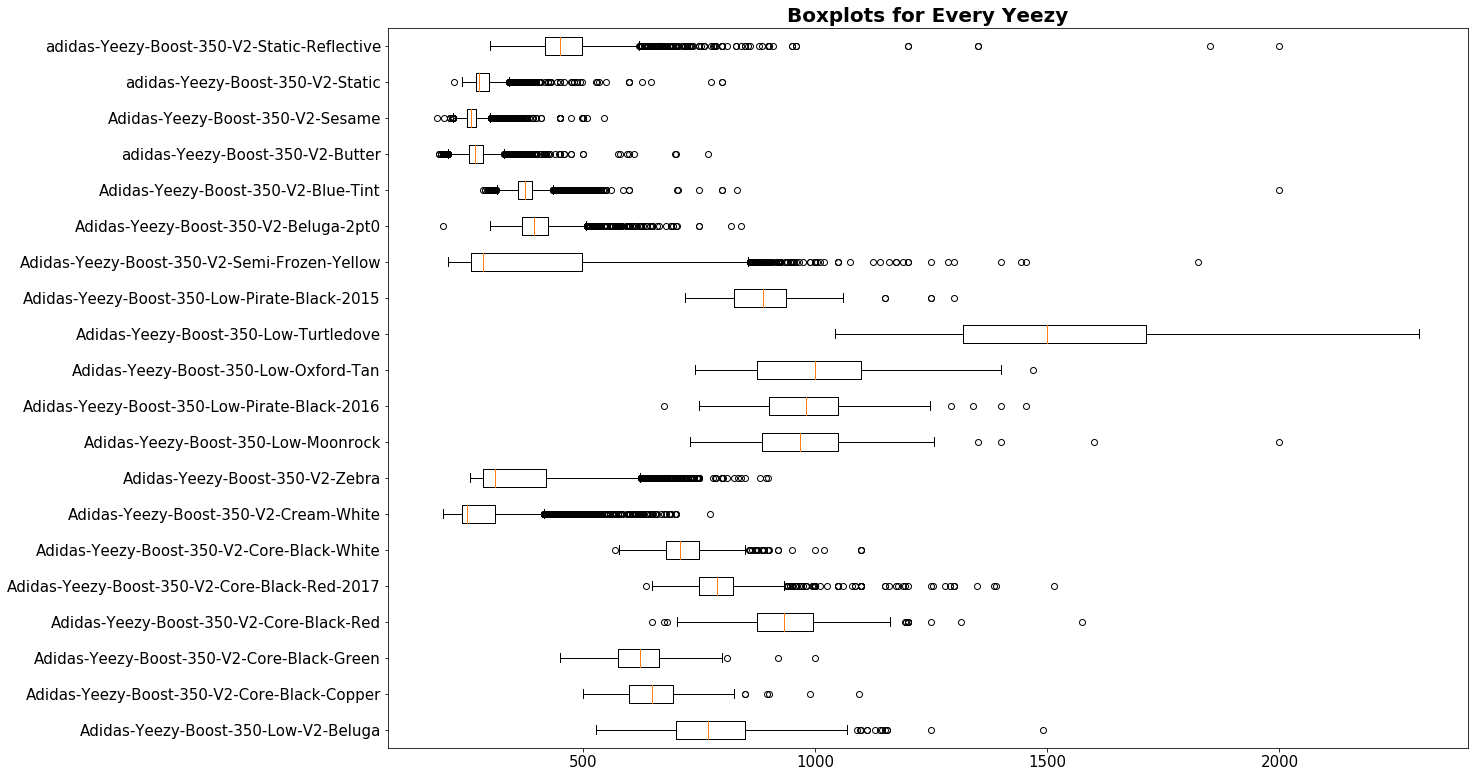

In [7]:
data = []

for sneaker in yeezy["Sneaker Name"].unique():
    sneaker_sales = yeezy[yeezy["Sneaker Name"] == sneaker]["Sale Price"].values
    data.append(sneaker_sales)
    
    
# Setting up figure
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])

# Plotting the boxplot horizontally
ax.boxplot(data, vert=False)

# Setting the y-ticks to the sneaker names
# Order of the list 'data' is the same order as yeezy["Sneaker Name"].unique()
ax.set_yticklabels(list(yeezy["Sneaker Name"].unique()))

# Changing the title
plt.title("Boxplots for Every Yeezy", 
          fontdict={"fontsize":20, "fontweight":"bold"})
# Changing the size of ticks
plt.tick_params(labelsize=15)

plt.show()
    

### Findings
We can see that the majority of the outliers based on the box plot lie in the upper end of the sale price. This is as expected because to my knowledge, sometimes people have early access to real pairs and they go on the resale market before the actual release date. We can expect the pre-sale transactions to be higher than the average sale price when they do release. We will explore the exact dates of these transactions later on.

What sticks out is the 1 transaction in the lower quartile of the Beluga V2 2.0. Let's see the exact sale price.

In [8]:
# Sorted the values to show the lowest transaction first
yeezy[yeezy["Sneaker Name"] == "Adidas-Yeezy-Boost-350-V2-Beluga-2pt0"].sort_values("Sale Price")


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
75709,2018-12-17,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,200.0,220,2017-11-25,5.0,Hawaii
15436,2018-01-17,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,300.0,220,2017-11-25,4.0,New Jersey
8220,2017-12-10,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,301.0,220,2017-11-25,4.0,New York
6776,2017-12-04,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,302.0,220,2017-11-25,4.0,New York
16513,2018-01-27,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,304.0,220,2017-11-25,4.0,Florida
...,...,...,...,...,...,...,...,...
4776,2017-11-28,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,702.0,220,2017-11-25,16.0,Georgia
20572,2018-03-14,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,750.0,220,2017-11-25,16.0,California
35950,2018-07-07,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,750.0,220,2017-11-25,16.0,Colorado
19197,2018-02-27,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,820.0,220,2017-11-25,16.0,Michigan


In [9]:
yeezy[yeezy["Sneaker Name"] == "Adidas-Yeezy-Boost-350-V2-Beluga-2pt0"]["Sale Price"].mean()

400.43966607984606

### Findings
Turns out the lowest price for the Beluga 2.0's were $200 in Hawaii in size 5. This transaction was made about a year later (12/17/2018) from the release date. The sneaker initally released on 11/25/2017. 

Looks like someone got a deal on these because the average sale price (according to this data) is about $400.

### Transactions that come before the release date and are considered outliers

As mentioned before, we want to see how many people are paying a higher premium prior the release date. We will look at the dates of the transactions of the outliers above the upper percentile (the circles outside the right line on the boxplot). 

Just to note that the outliers are determined by getting Q3 + (1.5 * IQR). Q3 = 75th Percentile. IQR (Interquartile range) = 75th percentile - 25th percentile.

There are multiple ways to get the different percentiles. One way is to access them through the boxplots we generated.
To do this we must:
1. Plot a boxplot for each sneaker
2. Access Q3 based on the boxplot. Method found [here](https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib).
3. Get every row that is greater than Q3 value (These are the outliers)
4. Access the dates of these rows
5. Store them into a dictionary. (dict[sneaker name] = outlier dates)



In [10]:
dates_dict = {}

for s in list(yeezy["Sneaker Name"].unique()):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_axes([0,0,1,1])
    sneaker = yeezy[yeezy["Sneaker Name"] == s]
    
    # 1
    b = ax.boxplot(sneaker["Sale Price"])
    # 2
    percentiles = [item.get_ydata()[1] for item in b["whiskers"]] # .get_ydata returns (25th percentile, 75th)
    # 3
    outliers = sneaker[sneaker["Sale Price"] > percentiles[1]] 
    # 4
    dates = outliers["Order Date"].values
    # 5
    dates_dict[s] = dates

# Create a copy for later on
new_dates_dict = dates_dict.copy()


Now we have the dates of the outliers, let's compare them to the release date of each sneaker. If the date comes before the release date then we know that transaction was a pre-sale transaction. We will count each transaction that is so.

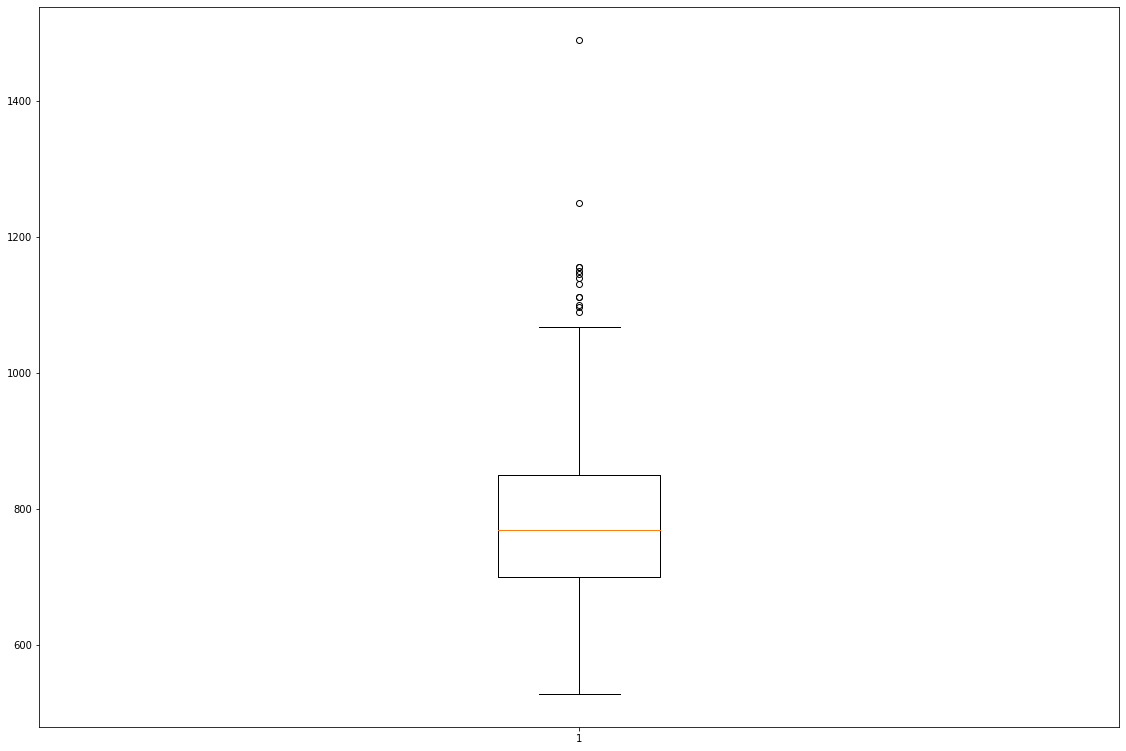

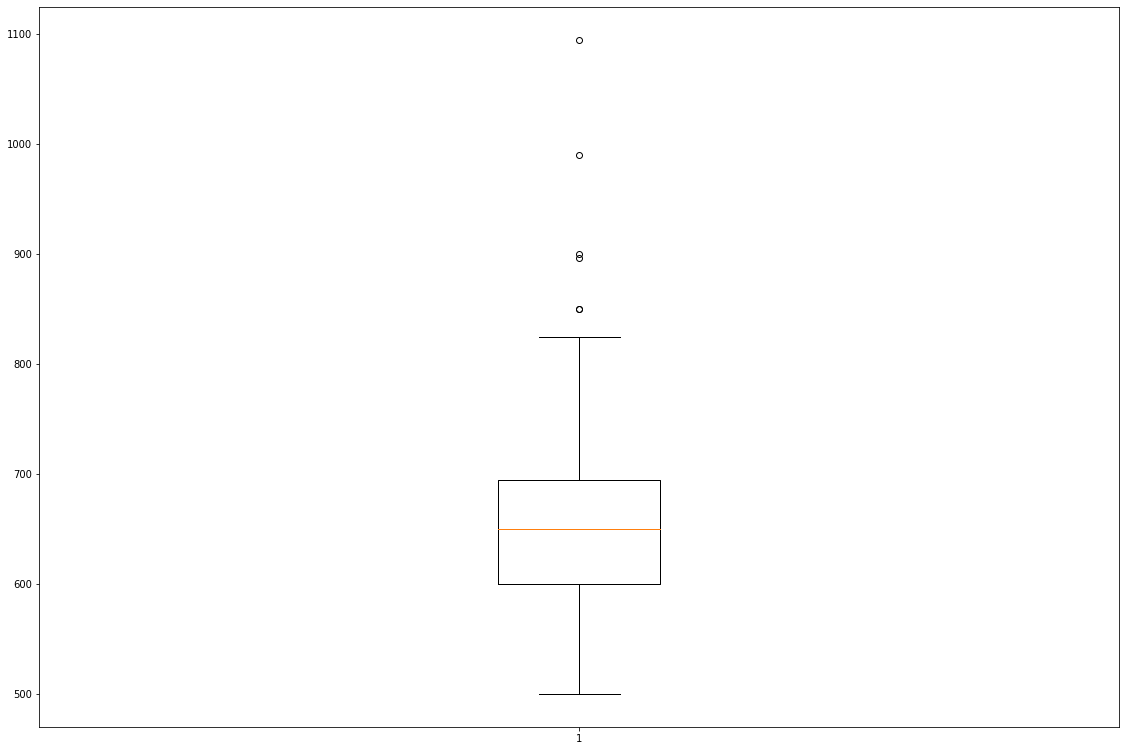

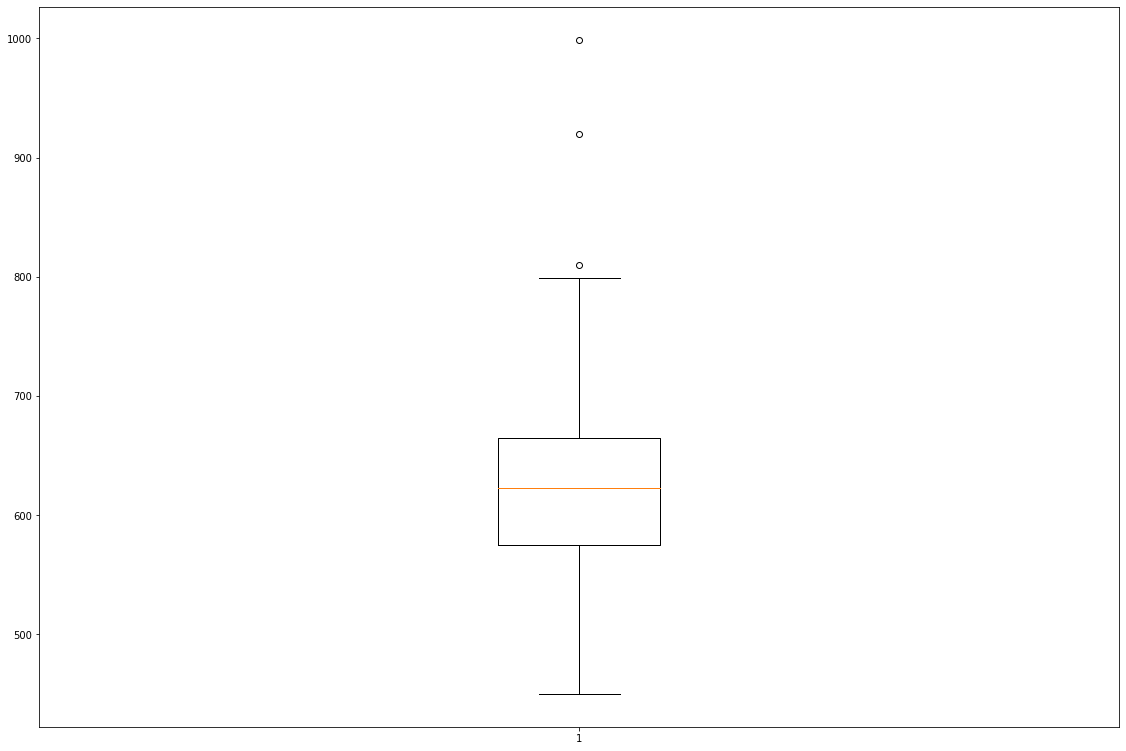

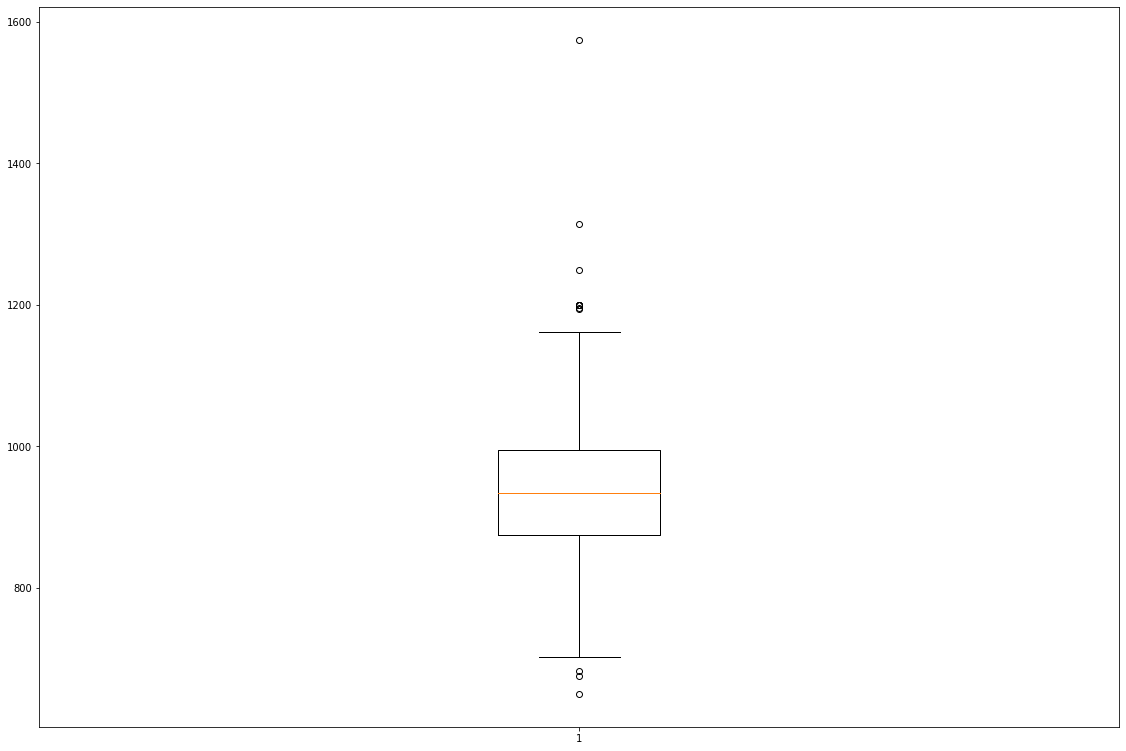

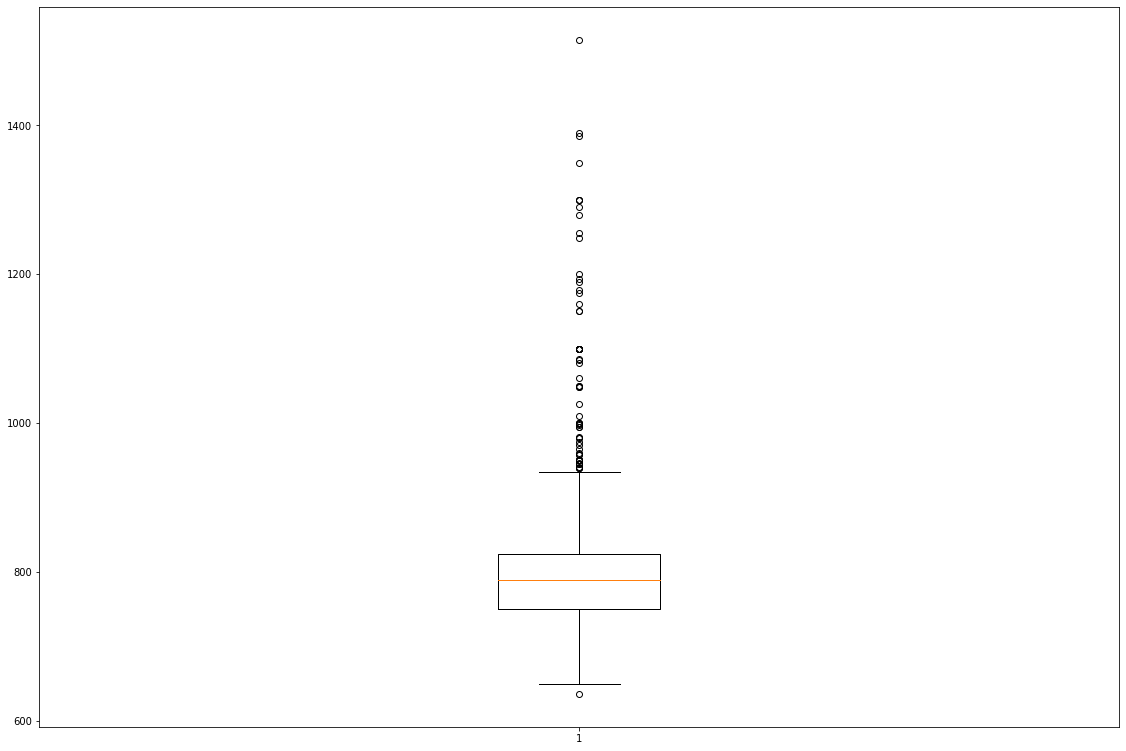

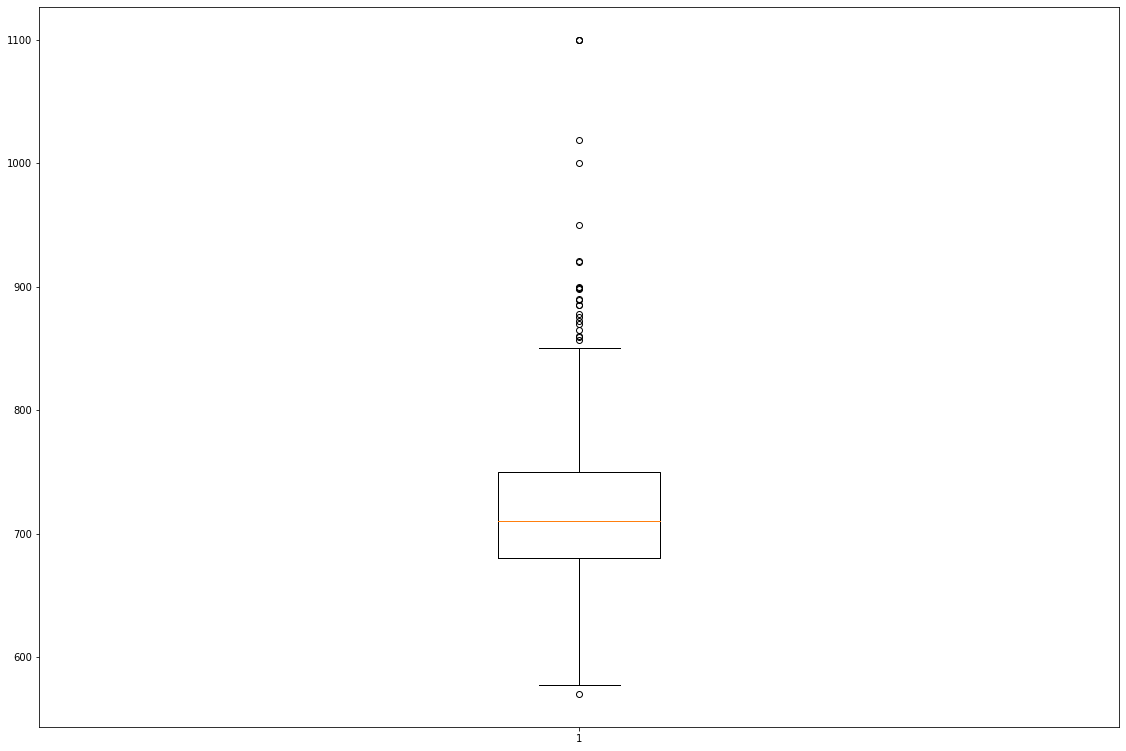

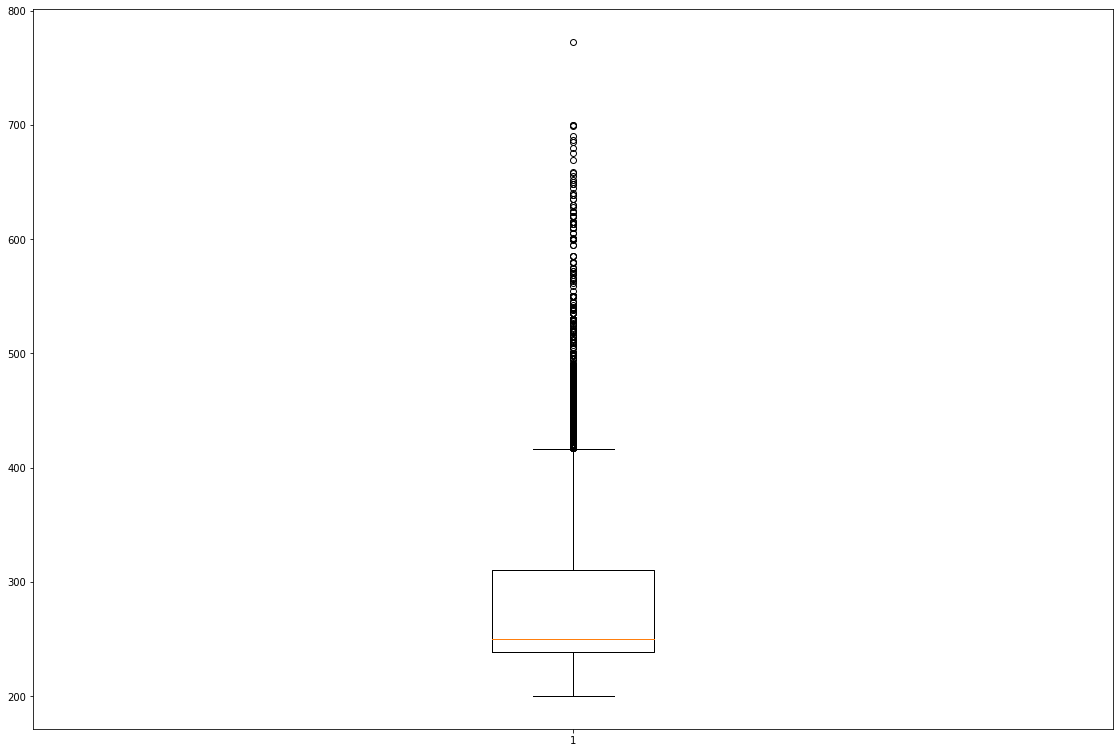

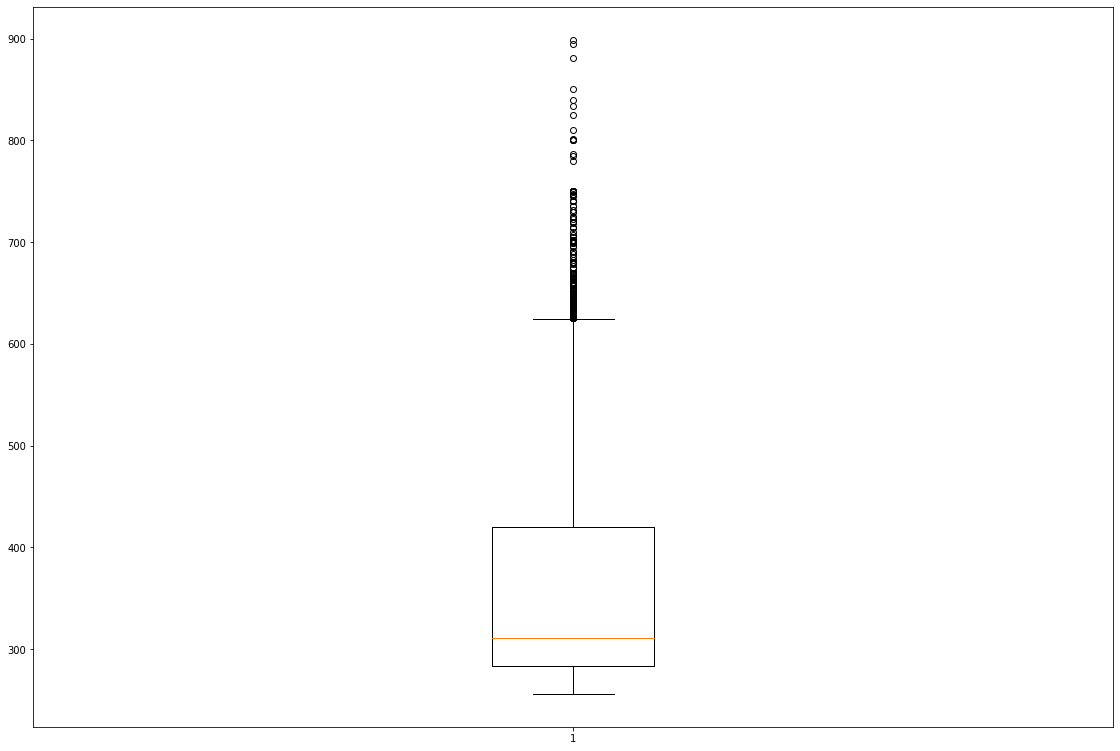

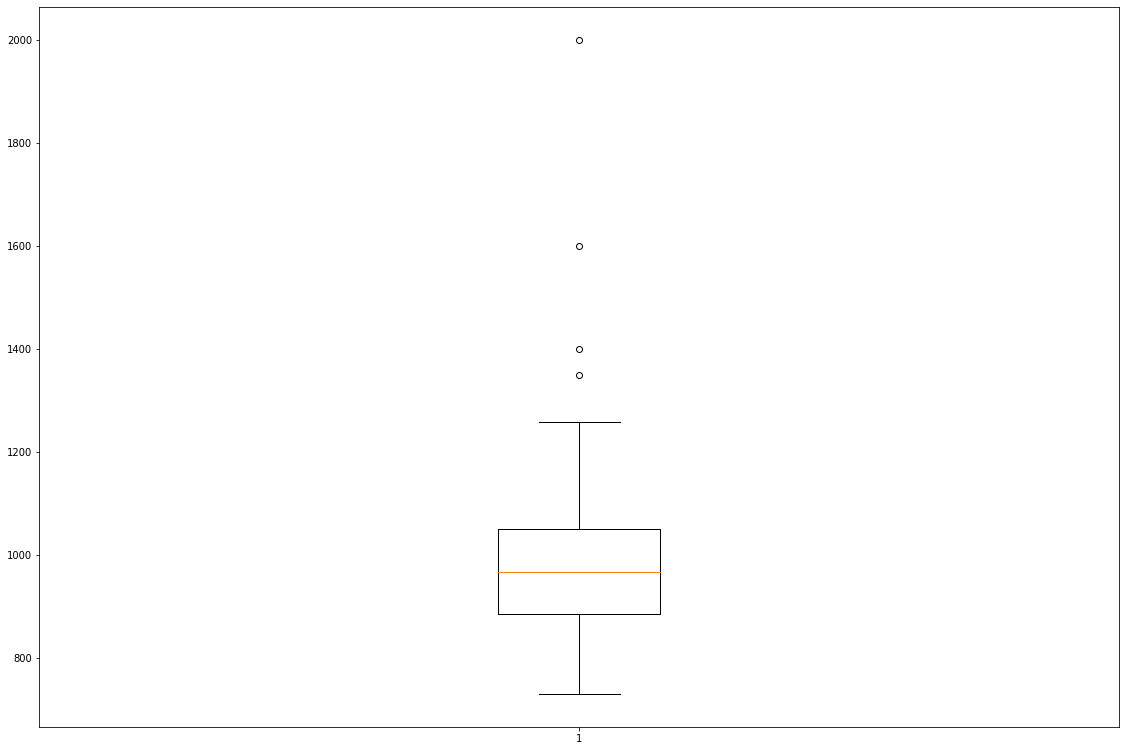

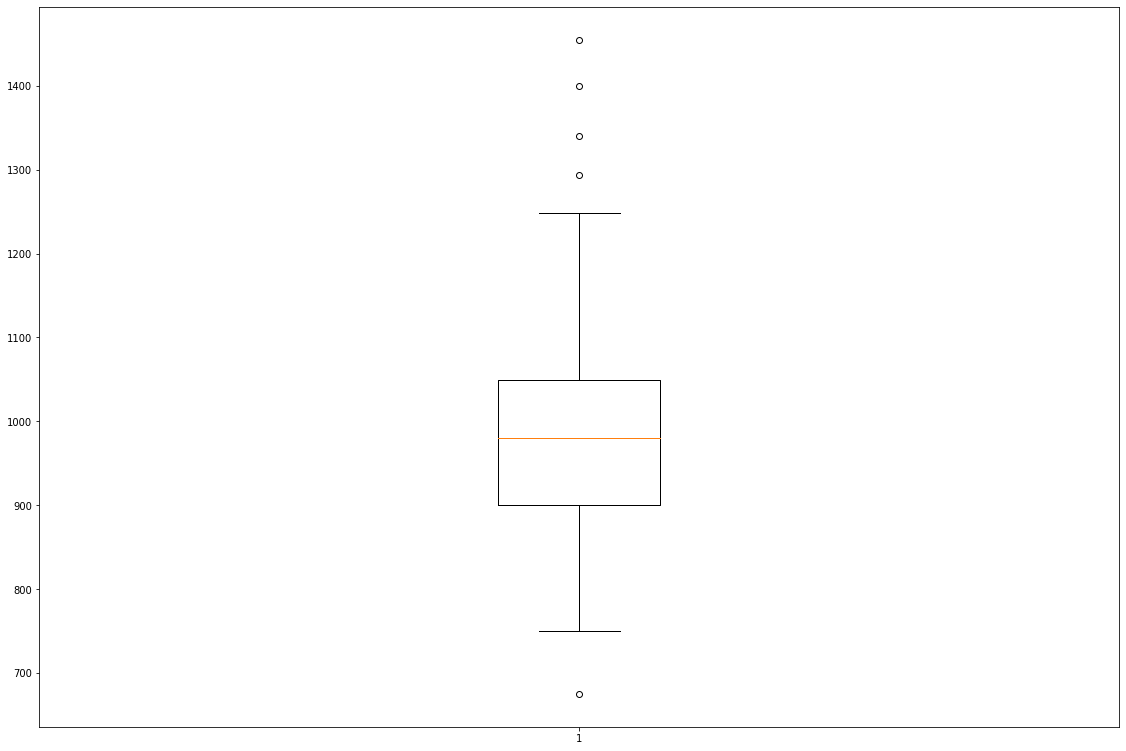

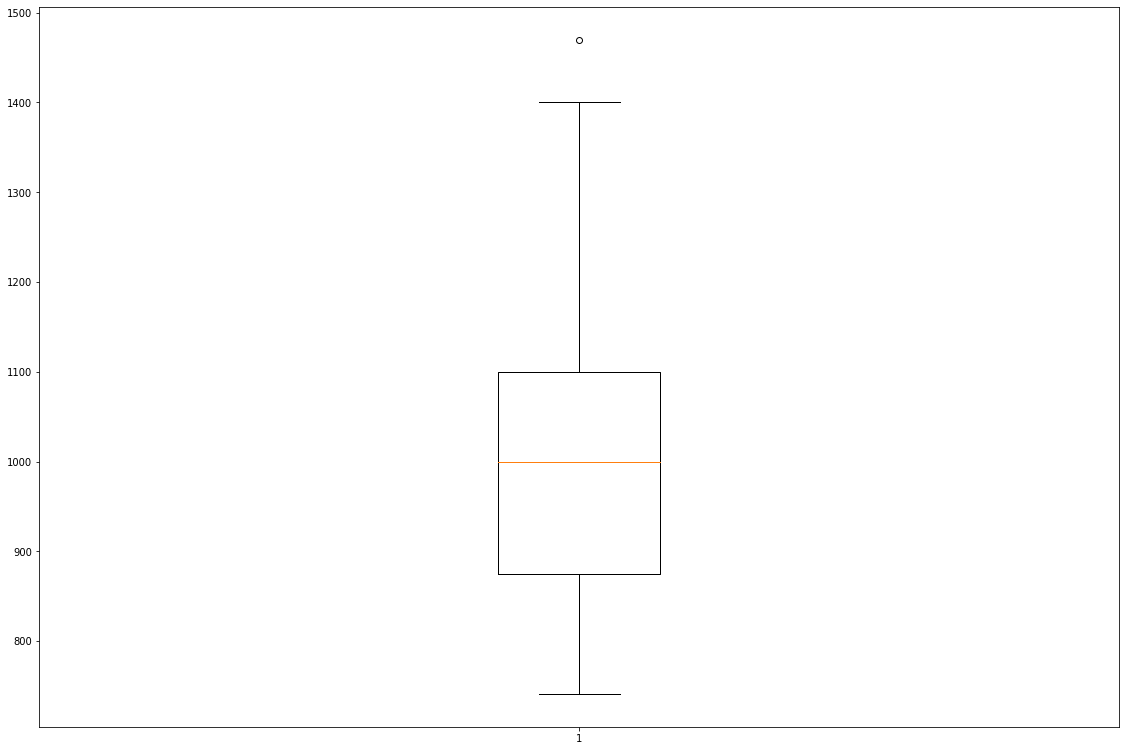

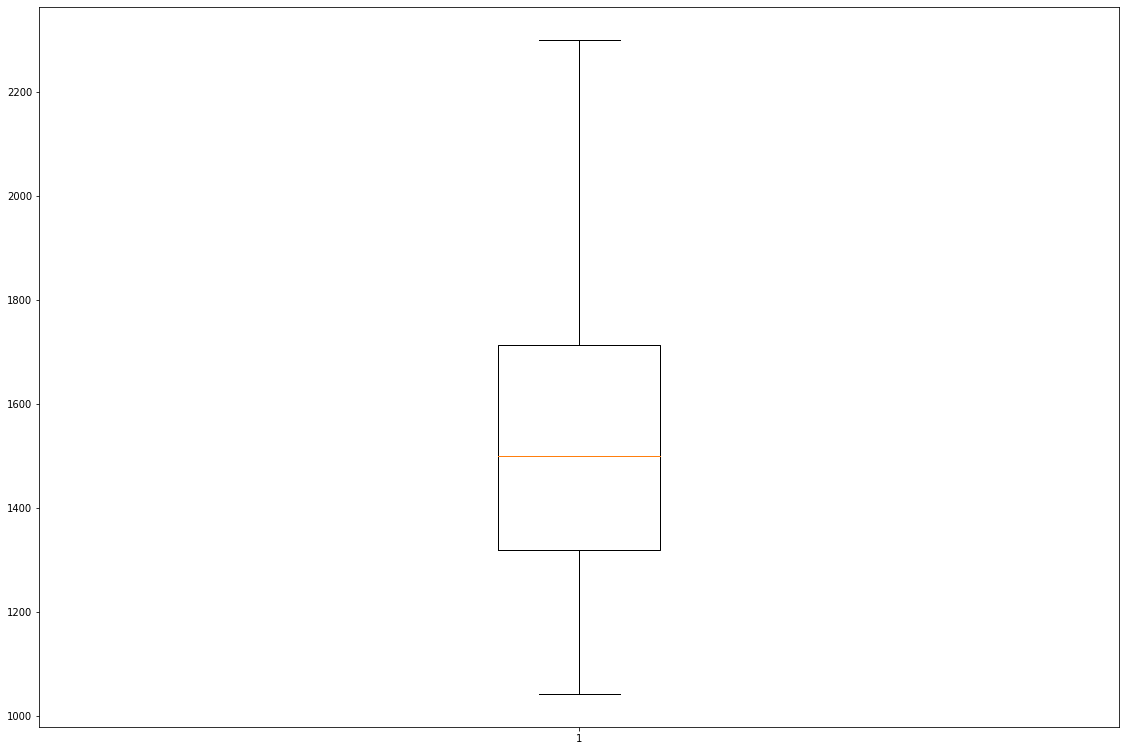

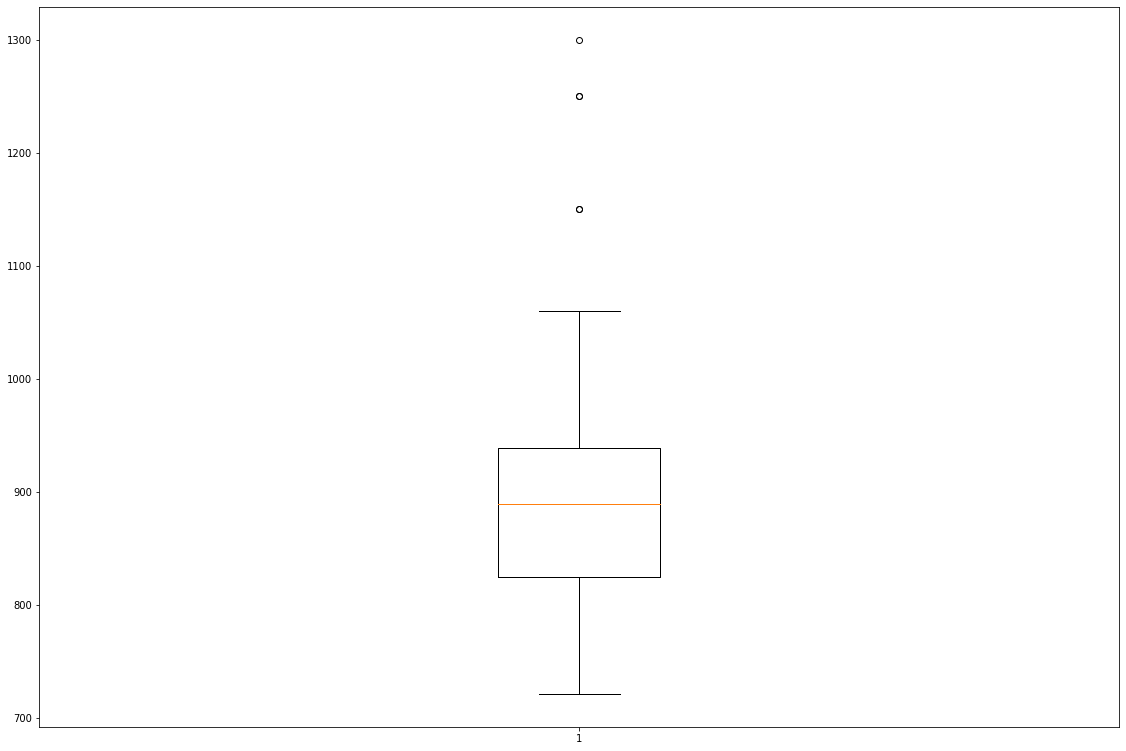

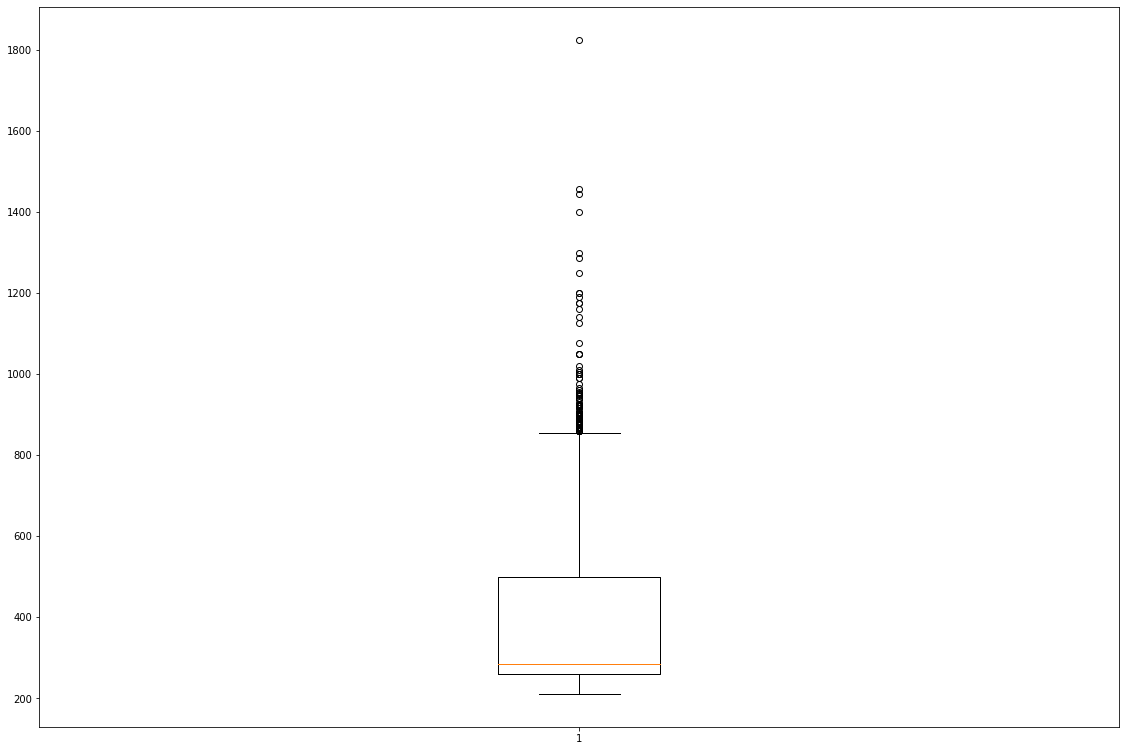

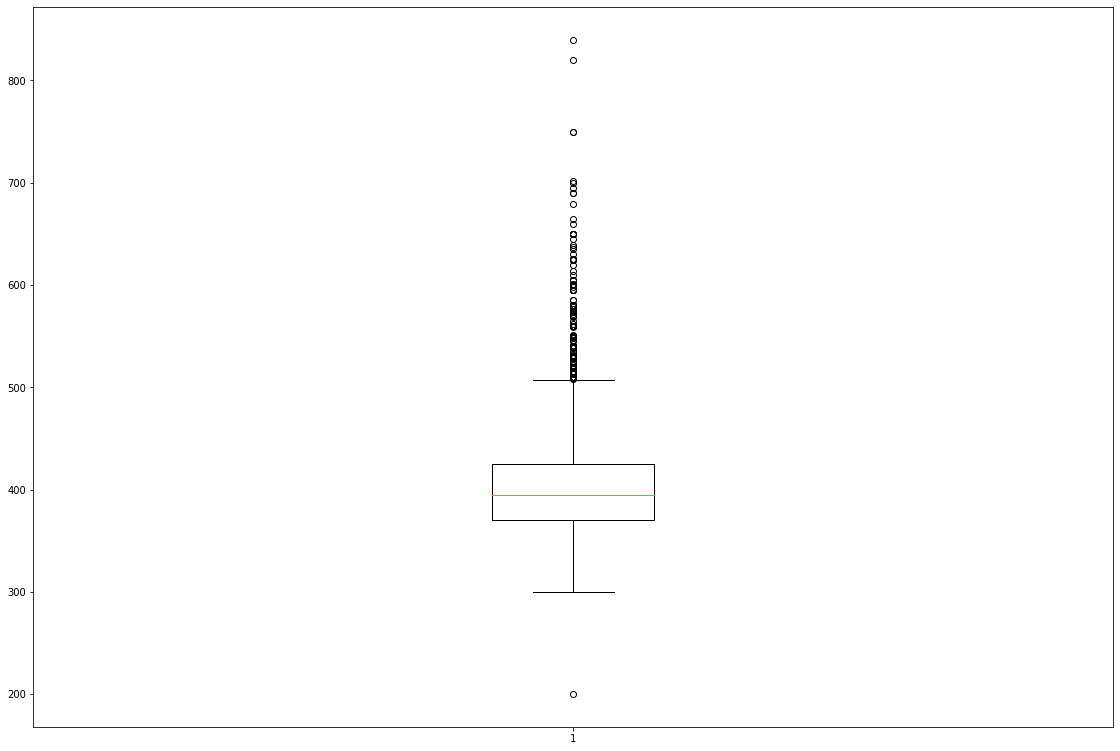

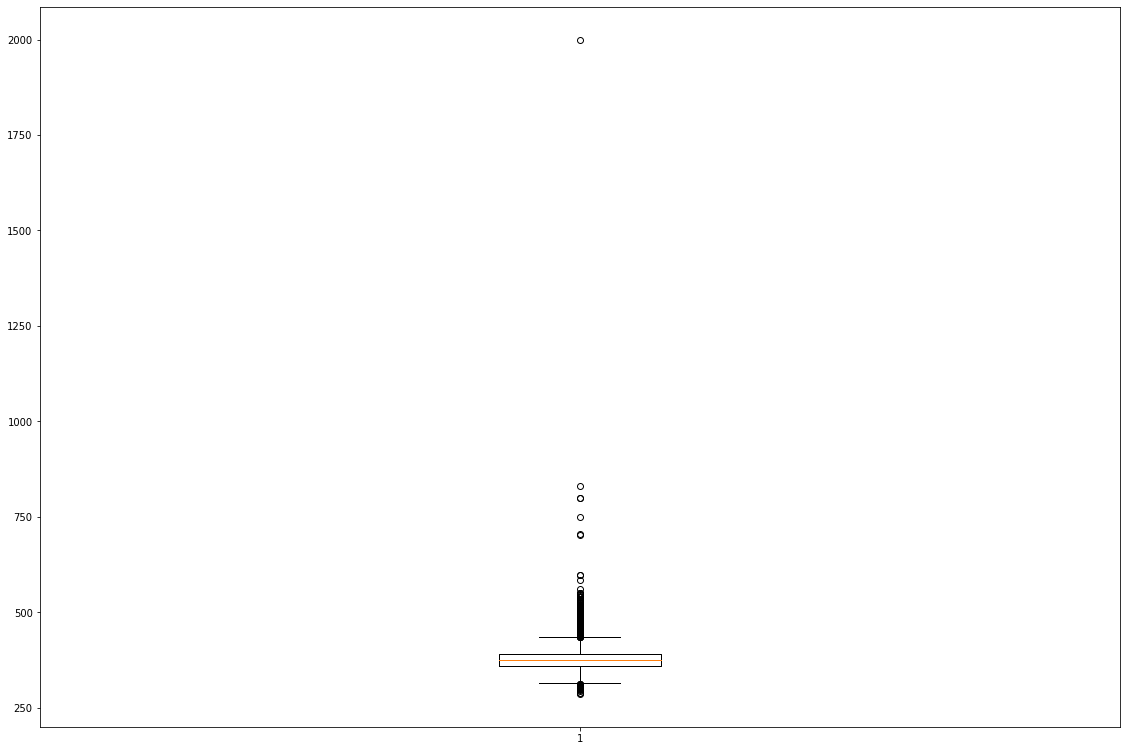

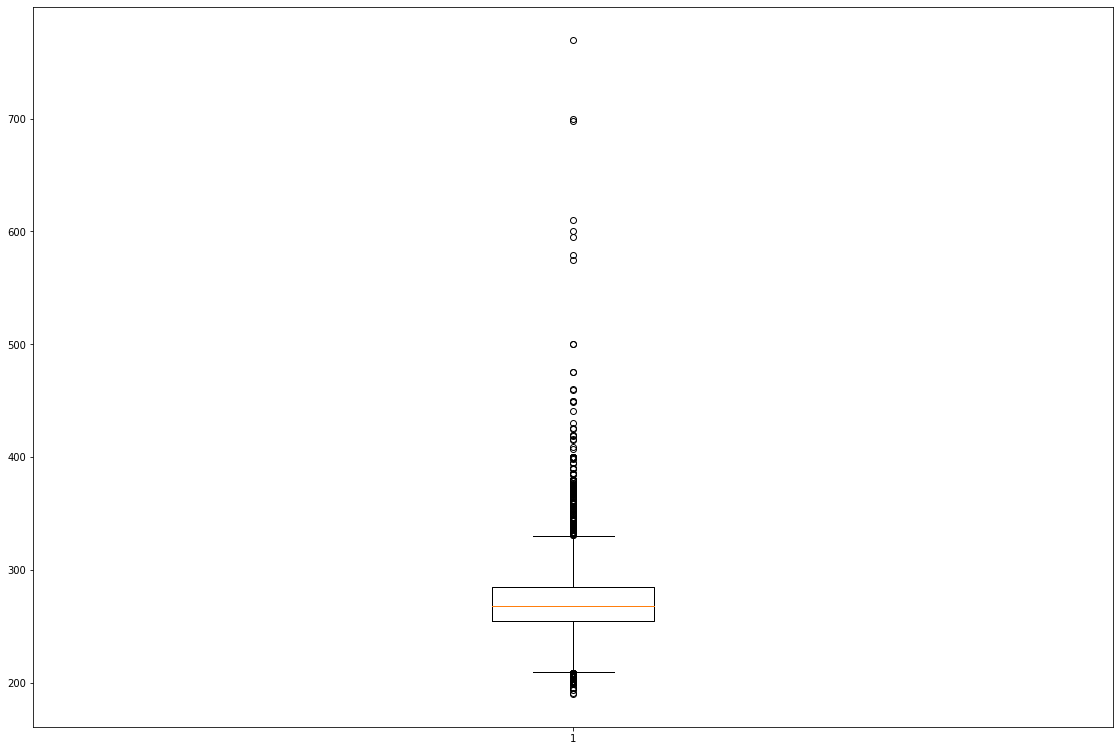

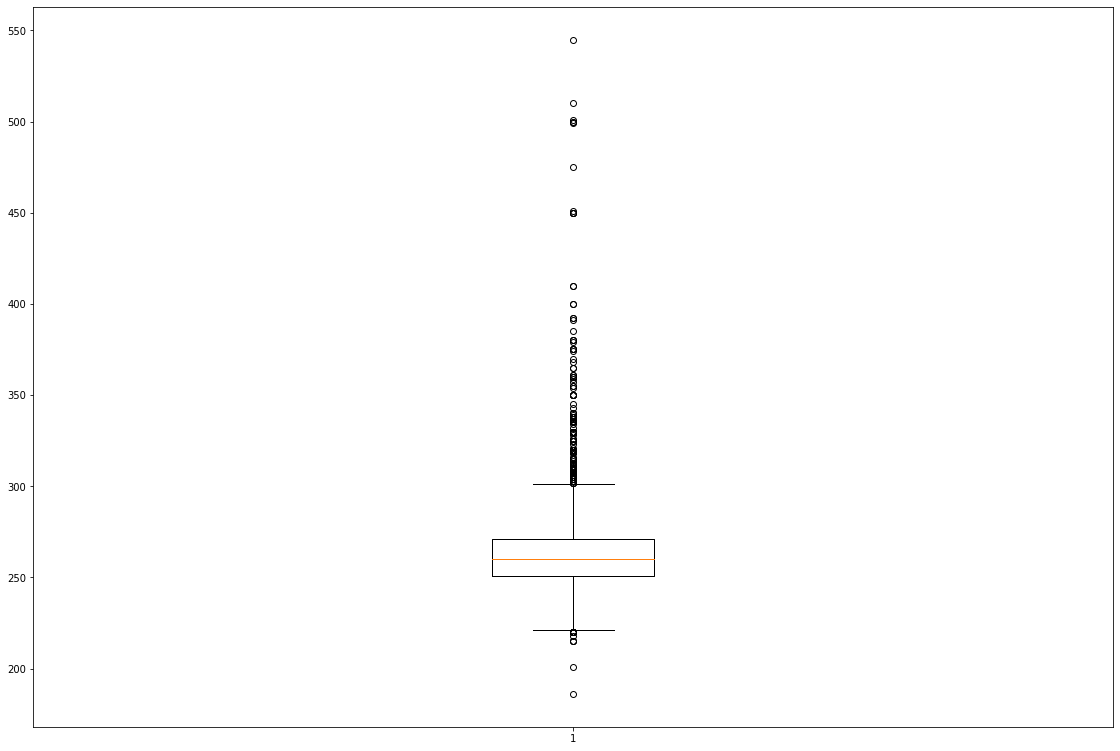

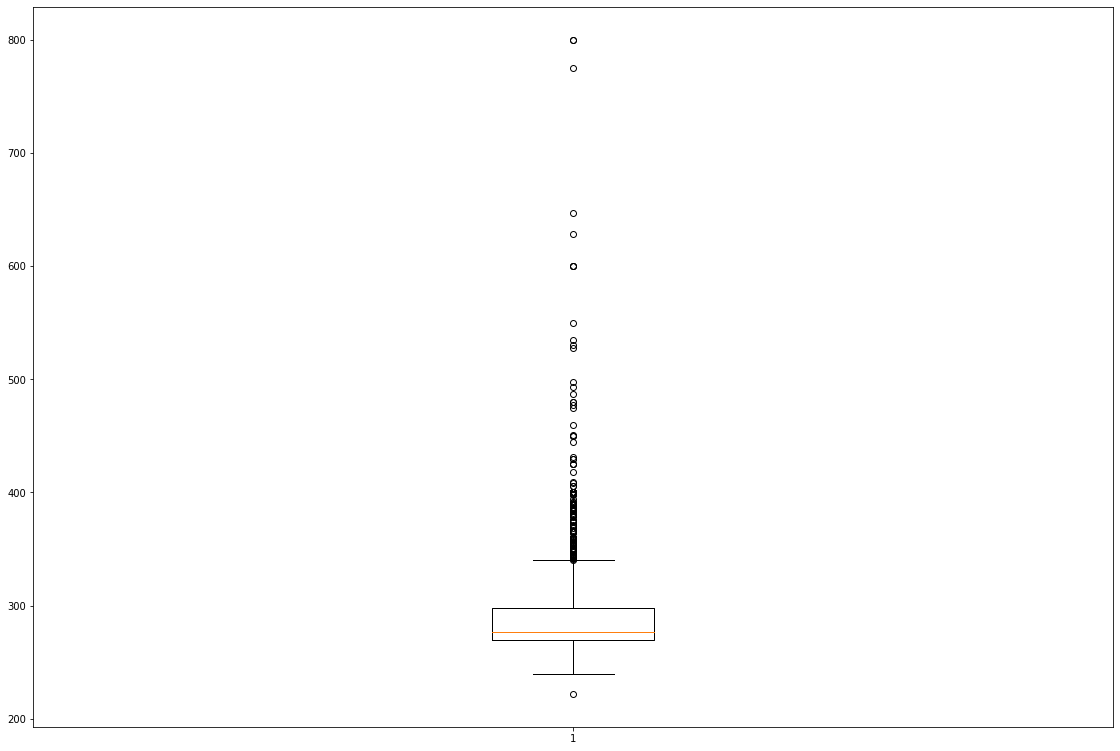

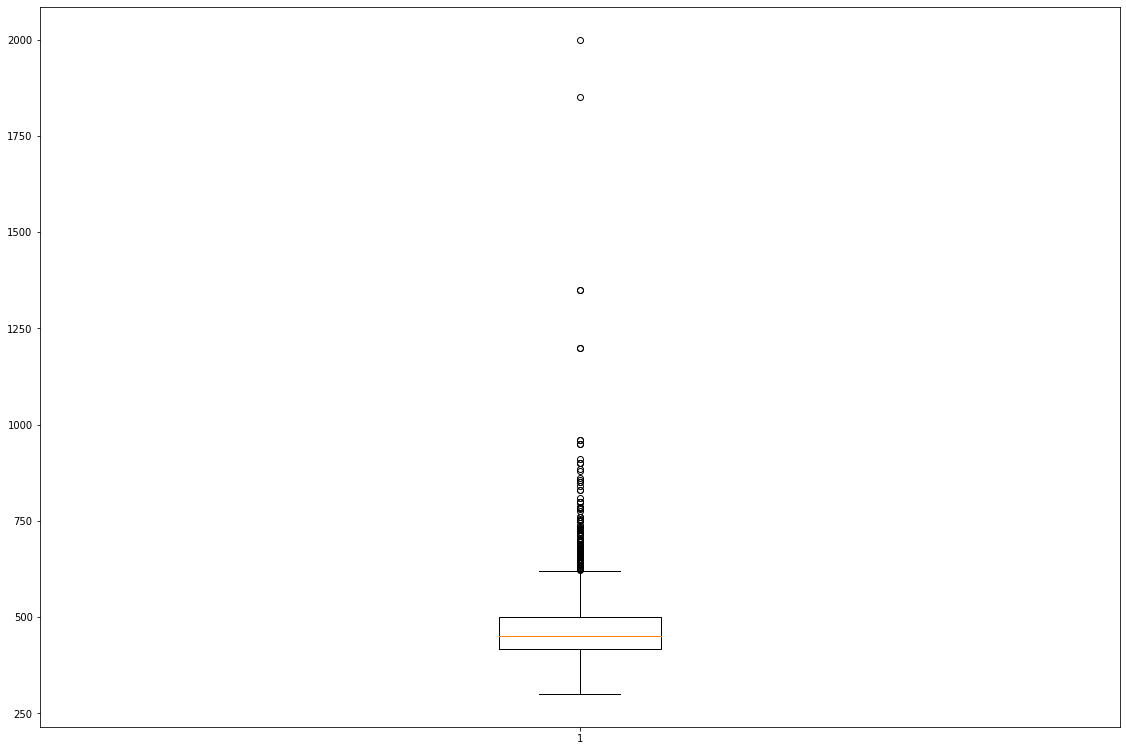

In [11]:
# All release dates were pulled from StockX
# I realized the dataset provides the release date for each sneaker after doing this method
release_dates = {'Adidas-Yeezy-Boost-350-Low-V2-Beluga': '2016-09-24',
                 'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper': '2016-11-23',
                 'Adidas-Yeezy-Boost-350-V2-Core-Black-Green': '2016-11-23',
                 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red': '2016-11-23',
                 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017': '2017-02-11',
                 'Adidas-Yeezy-Boost-350-V2-Core-Black-White': '2016-12-17',
                 'Adidas-Yeezy-Boost-350-V2-Cream-White': '2017-04-29',
                 'Adidas-Yeezy-Boost-350-V2-Zebra': '2017-02-25',
                 'Adidas-Yeezy-Boost-350-Low-Moonrock': '2015-11-14',
                 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016': '2016-02-19',
                 'Adidas-Yeezy-Boost-350-Low-Oxford-Tan': '2015-12-29',
                 'Adidas-Yeezy-Boost-350-Low-Turtledove': '2015-06-27',
                 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015': '2015-08-22',
                 'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow': '2017-11-18',
                 'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0': '2017-11-25',
                 'Adidas-Yeezy-Boost-350-V2-Blue-Tint': '2017-12-16',
                 'adidas-Yeezy-Boost-350-V2-Butter': '2018-06-30',
                 'Adidas-Yeezy-Boost-350-V2-Sesame': '2018-11-23',
                 'adidas-Yeezy-Boost-350-V2-Static': '2018-12-27',
                 'adidas-Yeezy-Boost-350-V2-Static-Reflective': '2018-12-26'} 


# Change each value to np.datetime64 object so we can it to the dates_dict
for key in release_dates:
    release_dates[key] = pd.to_datetime(release_dates[key], format="%Y-%m-%d")
    
# Copy dict for later on
new_release_dates = release_dates.copy()



In [12]:
# Transactions that are outliers and before the release date
count = 0

# key is the sneaker
for key in dates_dict:
    # i are the dates of the outliers
    for i in dates_dict[key]:
        # compare i with the release date
        if i < release_dates[key]:
            count += 1
            
            
# Total count of transactions that are outliers
len_outliers = 0

for key in dates_dict:
    len_outliers += len(dates_dict[key])
    

In [13]:
pct = round((count/len_outliers) * 100, 2)

print("About {:.2f}% of the outlier tansactions came before the release date.".format(pct))


## One caveat to this though, since we only have data going back to september 2017 and some shoes released earlier
## than that. So we don't have the presale data for those sneakers.
## We will get rid of any sneakers that released before Sept. 2017.

About 21.34% of the outlier tansactions came before the release date.


We can see that about 21.34% of the outliers came before the release date of the respective shoe. One caveat to this though is that we only have data going back to September 2017. Some of these shoes in these transactions released before 2017, meaning that we don't have any presale data for those sneakers. 

Let's find out which shoes released before September 2017.

To do this we must:
1. Look at the original `yeezy` dataframe.
2. Group by `Sneaker Name`.
3. Return the shoe name and release date.
4. Sort by the release date.

In [14]:
group = yeezy.groupby("Sneaker Name")

cut_off = np.datetime64("2017-09-01")

snkr = group.apply(lambda x: x["Release Date"].unique()).sort_values()
before_2017 = snkr[snkr < cut_off]

before_2017

Sneaker Name
Adidas-Yeezy-Boost-350-Low-Turtledove            [2015-06-27T00:00:00.000000000]
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015     [2015-08-22T00:00:00.000000000]
Adidas-Yeezy-Boost-350-Low-Moonrock              [2015-11-14T00:00:00.000000000]
Adidas-Yeezy-Boost-350-Low-Oxford-Tan            [2015-12-29T00:00:00.000000000]
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016     [2016-02-19T00:00:00.000000000]
Adidas-Yeezy-Boost-350-Low-V2-Beluga             [2016-09-24T00:00:00.000000000]
Adidas-Yeezy-Boost-350-V2-Core-Black-Red         [2016-11-23T00:00:00.000000000]
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper      [2016-11-23T00:00:00.000000000]
Adidas-Yeezy-Boost-350-V2-Core-Black-Green       [2016-11-23T00:00:00.000000000]
Adidas-Yeezy-Boost-350-V2-Core-Black-White       [2016-12-17T00:00:00.000000000]
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017    [2017-02-11T00:00:00.000000000]
Adidas-Yeezy-Boost-350-V2-Zebra                  [2017-02-25T00:00:00.000000000]
Adidas-Yeezy-Bo

These are the sneakers that released before September 2017:
1. Adidas-Yeezy-Boost-350-Low-Turtledove            
2. Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015     
3. Adidas-Yeezy-Boost-350-Low-Moonrock              
4. Adidas-Yeezy-Boost-350-Low-Oxford-Tan            
5. Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016     
6. Adidas-Yeezy-Boost-350-Low-V2-Beluga             
7. Adidas-Yeezy-Boost-350-V2-Core-Black-Red         
8. Adidas-Yeezy-Boost-350-V2-Core-Black-Copper      
9. Adidas-Yeezy-Boost-350-V2-Core-Black-Green       
10. Adidas-Yeezy-Boost-350-V2-Core-Black-White       
11. Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017    
12. Adidas-Yeezy-Boost-350-V2-Zebra                  
13. Adidas-Yeezy-Boost-350-V2-Cream-White   

Do they take up a big portion of the outliers? Let's find out.

In [15]:
# Total count of transactions of the shoes listed above that are outliers
len_outliers_17 = 0

for s in before_2017.index:
    len_outliers_17 += len(dates_dict[s])
    
print("The shoes that released before Sept. 2017 made up {:.2f}% of the total outliers."
      .format((len_outliers_17 / len_outliers)*100))    

The shoes that released before Sept. 2017 made up 46.28% of the total outliers.


### Findings
Based on our findings, the shoes that released before September 2017 made up 46.28% of the total outliers. Let's remove these shoes and look at how many of the outliers of the remaining shoes came before the release date.

In [16]:
cut_off = np.datetime64("2017-09-01") # September 1st, 2017

for key in release_dates:
    if release_dates[key] < cut_off:
        # We don't want to modify the original
        new_release_dates.pop(key)
        new_dates_dict.pop(key)
        

In [17]:
## Transactions that are outliers and before the release date
new_count = 0

for key in new_dates_dict:
    for i in new_dates_dict[key]:
        if i < new_release_dates[key]:
            new_count += 1
            
## Total count of transactions that are outliers
new_len_outliers = 0

for key in new_dates_dict:
    new_len_outliers += len(new_dates_dict[key])
    
new_pct = round((new_count/new_len_outliers) * 100, 2)

print("About {:.2f}% of the outlier tansactions came before their respective release date.".format(new_pct))

About 39.72% of the outlier tansactions came before their respective release date.


### Findings
**About 39.72%** of the outlier transactions came before their respective release date.

Safe to say that if you are trying to save a bit of money, you probably shouldn't pay the pre-sale prices. Just know that patience is a virtue.

### Total Yeezy Sales

In [18]:
yzy_ts = yeezy["Sale Price"].sum()

print("In the resale market, Yeezys yielded about ${:,.2f} in total sales.".format(yzy_ts))

In the resale market, Yeezys yielded about $25,980,674.29 in total sales.


## Off-white

### Checking for extreme outliers

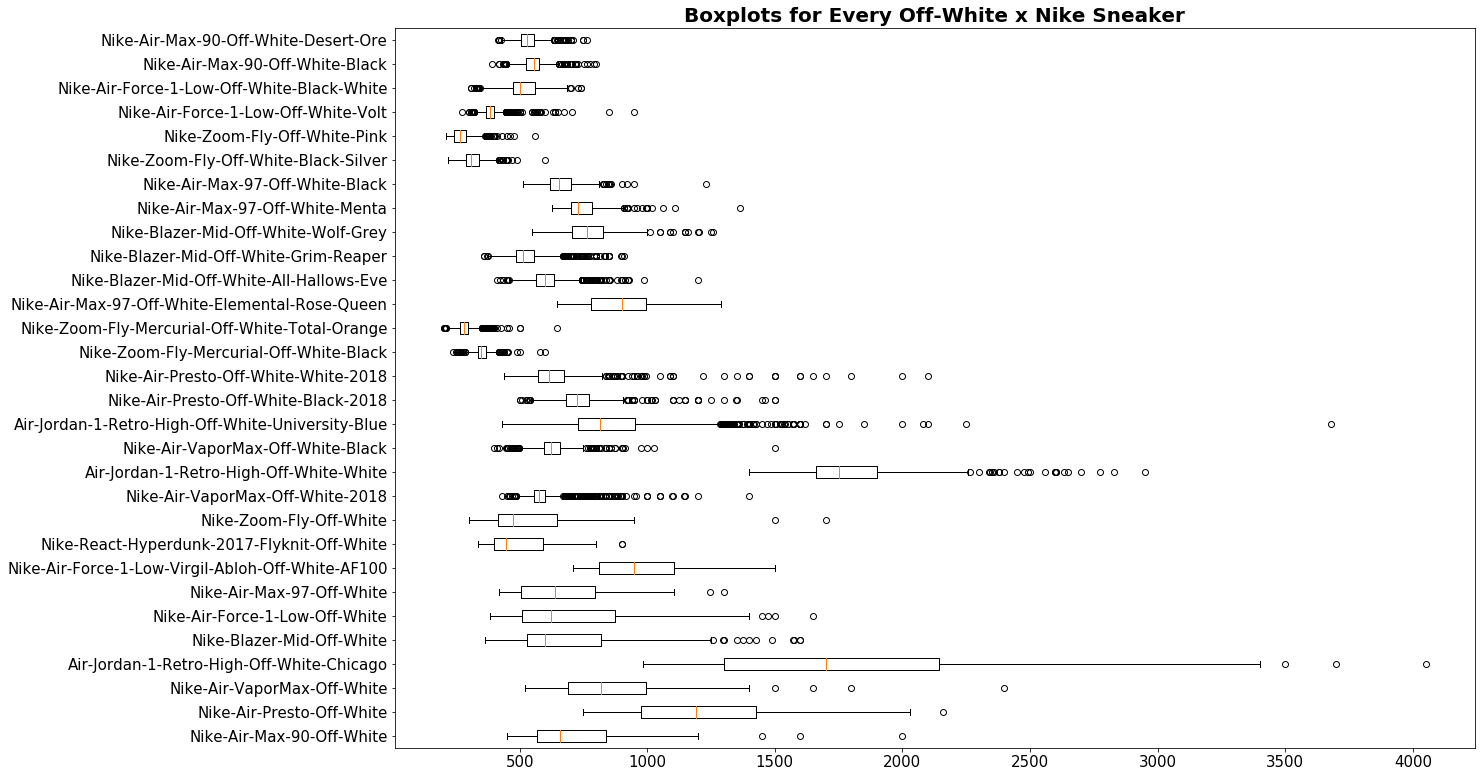

In [19]:
data = []

for sneaker in off_white["Sneaker Name"].unique():
    sneaker_sales = off_white[off_white["Sneaker Name"] == sneaker]["Sale Price"].values
    data.append(sneaker_sales)
    
    
# Setting up figure
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])

# Plotting the boxplot horizontally
ax.boxplot(data, vert=False)

# Setting the y-ticks to the sneaker names
# Order of the list 'data' is the same order as yeezy["Sneaker Name"].unique()
ax.set_yticklabels(list(off_white["Sneaker Name"].unique()))

# Changing the title
plt.title("Boxplots for Every Off-White x Nike Sneaker", 
          fontdict={"fontsize":20, "fontweight":"bold"})
# Changing the size of ticks
plt.tick_params(labelsize=15)

plt.show()

### Findings
The one outlier that sticks out the most is the AJ1 Off white University Blue. Let's see the exact details of this transaction.

In [20]:
off_white[off_white["Sneaker Name"] == 'Air-Jordan-1-Retro-High-Off-White-University-Blue'].sort_values("Sale Price", 
                                                                                                        ascending=False)




,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
25935,2018-05-16,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,3680.0,190,2018-06-23,9.5,New Jersey
41773,2018-08-03,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,2250.0,190,2018-06-23,17.0,Arizona
26277,2018-05-22,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,2100.0,190,2018-06-23,9.5,Florida
26211,2018-05-21,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,2080.0,190,2018-06-23,12.0,Florida
26341,2018-05-23,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,2000.0,190,2018-06-23,9.0,New York
...,...,...,...,...,...,...,...,...
30853,2018-06-20,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,460.0,190,2018-06-23,4.0,New York
31064,2018-06-21,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,450.0,190,2018-06-23,4.5,Pennsylvania
30332,2018-06-18,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,450.0,190,2018-06-23,4.0,Oregon
30432,2018-06-18,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,449.0,190,2018-06-23,6.0,California


In [21]:
off_white[off_white["Sneaker Name"] == 'Air-Jordan-1-Retro-High-Off-White-University-Blue']["Sale Price"].mean()

850.8535029773462

### Findings
It seems like 1 person in **New Jersey paid $3,680 for a size 9.5 about 1 month before** the release date. The average resale price for the AJ1 Off-White University Blues were \$850.85. 

The purchase was on 2018-05-16. Release date was 2018-06-23.

## 1. Findings: Total Off-White Sales vs. Total Yeezy Sales

In [22]:
ow_ts = off_white["Sale Price"].sum()

print("In the resale market, Off-Whites yielded about ${:,.2f} in total sales.".format(ow_ts))
print("In the resale market, Yeezys yielded about ${:,.2f} in total sales.\n".format(yzy_ts))

print("Off-whites had an average sale of ${:.2f} per transaction.".format(ow_ts / off_white.shape[0]))
print("Yeezys had an average sale of ${:.2f} per transaction.".format(yzy_ts / yeezy.shape[0]))

In the resale market, Off-Whites yielded about $18,663,149.21 in total sales.
In the resale market, Yeezys yielded about $25,980,674.29 in total sales.

Off-whites had an average sale of $671.48 per transaction.
Yeezys had an average sale of $360.03 per transaction.


## 2. Which regions had the most sales/transactions? Based on Yeezys/Off-White?

### Yeezys

In [23]:
yzy_region = yeezy.groupby("Buyer Region")["Sale Price"].sum()

yzy_region = pd.DataFrame(yzy_region).sort_values("Sale Price", ascending=False)

# Gets rid of scientific notation when displaying df
pd.set_option('display.float_format', lambda x: "%.2f" % x)

# Number of transactions per Buyer Region
# Grouping by Buyer Region, sorting the values to descending, picking any column since its just counting the 
yzy_region["transactions"] = yeezy.groupby("Buyer Region").count().sort_values("Sale Price", ascending=False)["Order Date"]

# Top 5 regions
yzy_region.head()

,Sale Price,transactions
Buyer Region,,
California,4901395.16,13113
New York,4364508.05,12103
Oregon,1987687.48,5396
Florida,1610689.91,4484
Texas,1558865.04,4455


### 2. Findings (Yeezys)
The regions that had the most sales are as follows:
1. California $4.9 mil
2. New York \$4.4 mil
3. Oregon \$2 mil
4. Florida \$1.6 mil
5. Texas \$1.5 mil

### Off-White

In [24]:
ow_region = off_white.groupby("Buyer Region")["Sale Price"].sum()

ow_region = pd.DataFrame(ow_region).sort_values("Sale Price", ascending=False)

# Number of transactions per Buyer Region
# Grouping by Buyer Region, sorting the values to descending, picking any column since its just counting the 
ow_region["transactions"] = off_white.groupby("Buyer Region").count().sort_values("Sale Price", ascending=False)["Order Date"]

# Top 5 regions
ow_region.head()

,Sale Price,transactions
Buyer Region,,
California,4352229.72,6236
New York,2952218.68,4422
Oregon,1618933.30,2285
Florida,1229343.75,1892
New Jersey,913464.40,1349


### 2. Findings (Off-White)

The regions that had the most sales are as follows:
1. California $4.3 mil
2. New York \$2.9 mil
3. Oregon \$1.6 mil
4. Florida \$1.2 mil
5. New Jersey \$913k

## 3. Which shoe was the "best" investment? In other words, which shoe has the highest ROI?
ROI means the return on investment. To put it simply, which shoe would have given you the greatest amount profit wise. We can either look at it as an average dollar amount perspective or an average percentage perspective. For this analysis we will focus on the **average percentage** because ROI is expressed as a percentage.

Things to note about ROI:
- It does not take into account the length of investment
- Investment can be negative or positive (Knowing these shoes though, all of them will be positive)

To calculate this (ROI), we must:
1. Figure out the initial investment. In this case, let's say it's the `retail price`.
2. Find the final value of the investment. In this case, it's the `sale price`.
3. Subtract those two values and divide by the cost of investment (retail price).
4. Multiply by 100.

In [25]:
def roi(df):
    
    roi = ((df["Sale Price"] - df["Retail Price"]) / df["Retail Price"]) * 100
    
    return roi
    
# Create a new column
yeezy["ROI (%)"] = roi(yeezy)

yeezy

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,ROI (%)
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.00,220,2016-09-24,11.00,California,398.64
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.00,220,2016-11-23,11.00,California,211.36
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.00,220,2016-11-23,11.00,California,213.64
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.00,220,2016-11-23,11.50,Kentucky,388.64
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.00,220,2017-02-11,11.00,Rhode Island,276.36
...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.00,220,2018-12-26,8.00,Oregon,156.82
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.00,220,2018-12-26,8.50,California,171.82
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.00,220,2018-12-26,5.50,New York,175.00
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.00,220,2018-12-26,11.00,California,195.45


In [26]:
# Do the same for Off-White

off_white["ROI (%)"] = roi(off_white)

off_white

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,ROI (%)
128,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1600.00,160,2017-09-09,8.00,California,900.00
129,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1090.00,160,2017-09-09,11.50,New York,581.25
130,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1344.00,160,2017-09-09,10.00,New York,740.00
131,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1325.00,160,2017-09-09,10.00,Massachusetts,728.12
132,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,1800.00,250,2017-09-09,12.00,Kentucky,620.00
...,...,...,...,...,...,...,...,...,...
99869,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,265.00,170,2018-11-28,11.00,New York,55.88
99870,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,331.00,170,2018-11-28,4.00,California,94.71
99871,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,405.00,170,2018-11-28,6.00,New York,138.24
99872,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,263.00,170,2018-11-28,10.00,Maryland,54.71


In [27]:
# Now let's group by each shoe 
# Find the average ROI

yzy_roi = yeezy.groupby("Sneaker Name").mean()["ROI (%)"]
ow_roi = off_white.groupby("Sneaker Name").mean()["ROI (%)"]

print(yzy_roi.sort_values(ascending=False))
print("="*100)
print(ow_roi.sort_values(ascending=False))



Sneaker Name
Adidas-Yeezy-Boost-350-Low-Turtledove           665.83
Adidas-Yeezy-Boost-350-Low-Oxford-Tan           405.76
Adidas-Yeezy-Boost-350-Low-Moonrock             398.36
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016    392.12
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015    347.55
Adidas-Yeezy-Boost-350-V2-Core-Black-Red        326.25
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   265.59
Adidas-Yeezy-Boost-350-Low-V2-Beluga            258.50
Adidas-Yeezy-Boost-350-V2-Core-Black-White      226.55
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper     198.47
Adidas-Yeezy-Boost-350-V2-Core-Black-Green      183.09
adidas-Yeezy-Boost-350-V2-Static-Reflective     112.79
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0            82.02
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow     77.54
Adidas-Yeezy-Boost-350-V2-Blue-Tint              72.27
Adidas-Yeezy-Boost-350-V2-Zebra                  64.21
Adidas-Yeezy-Boost-350-V2-Cream-White            31.23
adidas-Yeezy-Boost-350-V2-Static                 30.

### Findings
It seems like out of all the shoes, the **Off-White AJ1 All White** were the best investment with an average ROI of **861.09%**. In other words, you would have made **8 times** the retail price on average for each pair you sold.

Another note is that all the shoes yielded a positive ROI, meaning that no matter which shoe you decided to resale, you would have made some profit (assuming you initially bought it for retail).

In an alternate universe, let's say you were able to get every Off-White AJ1 All White and Adidas Yeezy 350 Boost Turtle Dove for retail. When would be the best times to sell each pair and to whom? 

## 4. Given the shoes with the highest ROI, when was the best time to sell those shoes?

To answer this question, we will conduct a heatmap. **This heatmap was inspired by the winner of the [2019 StockX Data Contest](https://stockx.com/news/it-it/2019-data-contest-winner/), Ryan Lee.** We want to show the average ROI based on the week number relative to the release date in each state.


First, we need to find the week number relative to the release date and we can do this by:
1. First group the transactions by week and get the average ROI.
2. Find the difference in days between the shoes. Divide by 7 to find the number of weeks.
3. Assign the week number to the week date.

### Off-White Air Jordan 1 All White

In [28]:
# pd.Grouper will group each date by week 
# Method found here: https://stackoverflow.com/questions/45281297/group-by-week-in-pandas
s = off_white.groupby(["Sneaker Name", "Buyer Region", pd.Grouper(key="Order Date", freq="W-MON")]).mean()

# Get only the OW AJ1 All White transactions
ow_allwhite = s[s.index.get_level_values(0) == "Air-Jordan-1-Retro-High-Off-White-White"].copy()

In [29]:
# Display results
ow_allwhite

Sale Price  \
Sneaker Name                            Buyer Region Order Date               
Air-Jordan-1-Retro-High-Off-White-White Arizona      2018-03-12     2350.00   
                                                     2018-03-19     1680.00   
                                                     2018-05-21     1900.00   
                                                     2018-06-04     1950.00   
                                                     2018-06-25     1900.00   
...                                                                     ...   
                                        Washington   2018-06-25     1750.00   
                                                     2018-08-06     1780.00   
                                        Wisconsin    2018-03-12     1666.00   
                                                     2018-03-19     1600.00   
                                                     2018-04-02     1650.00   

                                                                 Retail Price  \
Sneaker Name                            Buyer Region Order Date                 
Air-Jordan-1-Retro-High-Off-White-White Arizona      2018-03-12           190   
                                                     2018-03-19           190   
                                                     2018-05-21           190   
                                                     2018-06-04           190   
                                                     2018-06-25           190   
...                                                                       ...   
                                        Washington   2018-06-25           190   
                                                     2018-08-06           190   
                                        Wisconsin    2018-03-12           190   
                                                     2018-03-19           190   
                                                     2018-04-02           190   

                                                                 Shoe Size  \
Sneaker Name                            Buyer Region Order Date              
Air-Jordan-1-Retro-High-Off-White-White Arizona      2018-03-12      14.00   
                                                     2018-03-19       9.00   
                                                     2018-05-21       9.50   
                                                     2018-06-04       9.50   
                                                     2018-06-25      10.00   
...                                                                    ...   
                                        Washington   2018-06-25      11.00   
                                                     2018-08-06      11.50   
                                        Wisconsin    2018-03-12       9.50   
                                                     2018-03-19      12.00   
                                                     2018-04-02      10.00   

                                                                 ROI (%)  
Sneaker Name                            Buyer Region Order Date           
Air-Jordan-1-Retro-High-Off-White-White Arizona      2018-03-12  1136.84  
                                                     2018-03-19   784.21  
                                                     2018-05-21   900.00  
                                                     2018-06-04   926.32  
                                                     2018-06-25   900.00  
...                                                                  ...  
                                        Washington   2018-06-25   821.05  
                                                     2018-08-06   836.84  
                                        Wisconsin    2018-03-12   776.84  
                                                     2018-03-19   742.11  
                                                     2018-04-02   76

Next step is to label each order date with a week number relative to the release date. For an example, if the shoe released on 3/3/2018 and the transaction date was on 3/10/2018, 7 days after the release date. We would want to label that transaction as Week 1. If it was 3/11/2018, we want to label it Week 2. For any transactions before the release date, we will label it as -1 meaning 1 week before the release date.

To start off, we will create a function that takes the order date, compares it to the release date of the shoe, if its later than the release date (greater than), then we'll find difference in amount of days, divide by 7 to get the amount of weeks in decimals, and either use `math.ceil` or `math.floor` to round to the nearest week.

### Function to get the number of weeks before/after release date

In [30]:
import math

def week_num(df):
    
    week_nums = []
    
    # Release date of the shoe
    rd = pd.to_datetime("2018-03-03", format="%Y-%m-%d") 
    
    # Get_level_values refers to the order date index
    for x in df.index.get_level_values(2):
        
        # If the order date (x) is after the release date
        if x > rd:
            c = math.ceil((x - rd).days / 7)
            week_nums.append(c)
            
        # If the order date is before the release date
        # This will yield negative value to represent before release date
        else:
            f = math.floor((x - rd).days / 7)
            week_nums.append(f)
            
    return week_nums

# Applying the function we created to ow_allwhite
ow_allwhite["week"] = week_num(ow_allwhite)

# Result
ow_allwhite        

Sale Price  \
Sneaker Name                            Buyer Region Order Date               
Air-Jordan-1-Retro-High-Off-White-White Arizona      2018-03-12     2350.00   
                                                     2018-03-19     1680.00   
                                                     2018-05-21     1900.00   
                                                     2018-06-04     1950.00   
                                                     2018-06-25     1900.00   
...                                                                     ...   
                                        Washington   2018-06-25     1750.00   
                                                     2018-08-06     1780.00   
                                        Wisconsin    2018-03-12     1666.00   
                                                     2018-03-19     1600.00   
                                                     2018-04-02     1650.00   

                                                                 Retail Price  \
Sneaker Name                            Buyer Region Order Date                 
Air-Jordan-1-Retro-High-Off-White-White Arizona      2018-03-12           190   
                                                     2018-03-19           190   
                                                     2018-05-21           190   
                                                     2018-06-04           190   
                                                     2018-06-25           190   
...                                                                       ...   
                                        Washington   2018-06-25           190   
                                                     2018-08-06           190   
                                        Wisconsin    2018-03-12           190   
                                                     2018-03-19           190   
                                                     2018-04-02           190   

                                                                 Shoe Size  \
Sneaker Name                            Buyer Region Order Date              
Air-Jordan-1-Retro-High-Off-White-White Arizona      2018-03-12      14.00   
                                                     2018-03-19       9.00   
                                                     2018-05-21       9.50   
                                                     2018-06-04       9.50   
                                                     2018-06-25      10.00   
...                                                                    ...   
                                        Washington   2018-06-25      11.00   
                                                     2018-08-06      11.50   
                                        Wisconsin    2018-03-12       9.50   
                                                     2018-03-19      12.00   
                                                     2018-04-02      10.00   

                                                                 ROI (%)  week  
Sneaker Name                            Buyer Region Order Date                 
Air-Jordan-1-Retro-High-Off-White-White Arizona      2018-03-12  1136.84     2  
                                                     2018-03-19   784.21     3  
                                                     2018-05-21   900.00    12  
                                                     2018-06-04   926.32    14  
                                                     2018-06-25   900.00    17  
...                                                                  ...   ...  
                                        Washington   2018-06-25   821.05    17  
                                                     2018-08-06   836.84    23  
                                        Wisconsin    2018-03-12   776.84     2  
                                                     2018-03-19   742.11     

In [31]:
# We can drop the sneaker name index and order date index because
# It's only 1 sneaker and we have the week number (weeks since the release date)
ow_allwhite.index = ow_allwhite.index.droplevel(level=[0,2])

# Result
ow_allwhite

,Sale Price,Retail Price,Shoe Size,ROI (%),week
Buyer Region,,,,,
Arizona,2350.00,190,14.00,1136.84,2
Arizona,1680.00,190,9.00,784.21,3
Arizona,1900.00,190,9.50,900.00,12
Arizona,1950.00,190,9.50,926.32,14
Arizona,1900.00,190,10.00,900.00,17
...,...,...,...,...,...
Washington,1750.00,190,11.00,821.05,17
Washington,1780.00,190,11.50,836.84,23
Wisconsin,1666.00,190,9.50,776.84,2


With the result of applying the function, we can see that there are some weeks where there were 0 transactions because there are no rows for those weeks. To make it easier to plot a heat map later, we will have all the week numbers even if there were no transactions. To fix this, we are going to create a new dataframe with all the possible week numbers for that specific shoe with all null values in each column. 

Then we will use a right join on the original dateframe to compare what weeks where there were no transactions.

### New dataframe to represent every possible week

In [32]:
# Earliest transaction based on week number
earliest_w = ow_allwhite["week"].min() 
# Latest transaction based on week number
last_w = ow_allwhite["week"].max()

w = pd.DataFrame(np.arange(earliest_w, last_w),
                 columns=['week'])

# Creating new columns and filling them with nulls to represent there were no transactions for that week
w['Sale Price'], w['Retail Price'], w['Shoe Size'], w['ROI (%)'] = [np.nan, 
                                                                    np.nan, 
                                                                    np.nan, 
                                                                    np.nan]

# Result



### Figuring out which weeks where there were no transactions

In [33]:
all_weeks = pd.DataFrame() # Empty DataFrame

# Do it by region
test = ow_allwhite.groupby("Buyer Region")

for region, group in test:
    
    # Right Join because we add the values that weren't any transactions for the week number 
    # group is the data for each state
    group = pd.merge(pd.DataFrame(group), 
                     w,
                     left_on="week",
                     right_on="week",
                     how="right") 
    
    # Labeling each row with the state/region so it's easier to aggregate later on 
    # Also, we ignored the index (Buyer Region) while merging
    group["state"] = region
    
    all_weeks = all_weeks.append(group, ignore_index=True)

    
# Results
all_weeks

,Sale Price_x,Retail Price_x,Shoe Size_x,ROI (%)_x,week,Sale Price_y,Retail Price_y,Shoe Size_y,ROI (%)_y,state
0,2350.00,190.00,14.00,1136.84,2,nan,nan,nan,nan,Arizona
1,1680.00,190.00,9.00,784.21,3,nan,nan,nan,nan,Arizona
2,1900.00,190.00,9.50,900.00,12,nan,nan,nan,nan,Arizona
3,1950.00,190.00,9.50,926.32,14,nan,nan,nan,nan,Arizona
4,1900.00,190.00,10.00,900.00,17,nan,nan,nan,nan,Arizona
...,...,...,...,...,...,...,...,...,...,...
1919,nan,nan,nan,nan,46,nan,nan,nan,nan,Wisconsin
1920,nan,nan,nan,nan,47,nan,nan,nan,nan,Wisconsin
1921,nan,nan,nan,nan,48,nan,nan,nan,nan,Wisconsin
1922,nan,nan,nan,nan,49,nan,nan,nan,nan,Wisconsin


In [34]:
# Drop unnecessary columns
all_weeks.drop(columns=['Sale Price_y', 'Retail Price_y', 'Shoe Size_y', 'ROI (%)_y'], inplace=True)

In [35]:
# Remove the ending "_x" in the columns
column_map = {'Sale Price_x': "Sale Price", 
              'Retail Price_x': "Retail Price", 
              'Shoe Size_x': "Shoe Size", 
              'ROI (%)_x': "ROI (%)"}

all_weeks.rename(column_map, axis=1, inplace=True)

In [36]:
# Sort values by state and week number relative to the release date
all_weeks.sort_values(["state", "week"], inplace=True)

In [37]:
all_weeks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 7 to 1923
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sale Price    203 non-null    float64
 1   Retail Price  203 non-null    float64
 2   Shoe Size     203 non-null    float64
 3   ROI (%)       203 non-null    float64
 4   week          1924 non-null   int64  
 5   state         1924 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 105.2+ KB


In [38]:
all_weeks.reset_index(inplace=True, drop=True)

# Result
all_weeks

,Sale Price,Retail Price,Shoe Size,ROI (%),week,state
0,nan,nan,nan,nan,-1,Arizona
1,nan,nan,nan,nan,0,Arizona
2,nan,nan,nan,nan,1,Arizona
3,2350.00,190.00,14.00,1136.84,2,Arizona
4,1680.00,190.00,9.00,784.21,3,Arizona
...,...,...,...,...,...,...
1919,nan,nan,nan,nan,46,Wisconsin
1920,nan,nan,nan,nan,47,Wisconsin
1921,nan,nan,nan,nan,48,Wisconsin
1922,nan,nan,nan,nan,49,Wisconsin


### Formatting the df to make it heatmap friendly
To plot the heatmap, these are the following values we want:
1. `week` to be the columns
2. `state` to be the index
3. `ROI (%)` the values

In [39]:
pd.pivot_table(all_weeks, 
               values="ROI (%)",
               index="state",
               columns=["week"],
               fill_value=0)

# Seems like when pivotting it dropped Week 0 column or transactions that occurred on release day
# let's explore this further



week,-1,1,2,3,4,5,6,7,8,9,...,37,39,40,42,44,45,46,47,49,50
state,,,,,,,,,,,,,,,,,,,,,
Arizona,0.00,0.00,1136.84,784.21,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arkansas,0.00,0.00,836.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
California,860.53,887.95,786.55,785.53,742.11,826.05,794.65,846.32,814.47,837.72,...,1084.21,1087.89,0.00,1024.21,0.00,1389.47,1286.84,978.95,1152.63,968.68
Colorado,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Connecticut,0.00,0.00,0.00,900.00,0.00,0.00,713.68,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Delaware,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
District of Columbia,0.00,877.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1321.05,0.00,0.00,0.00
Florida,1047.37,820.79,794.74,0.00,0.00,0.00,0.00,0.00,0.00,788.95,...,0.00,945.79,814.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Georgia,0.00,884.21,797.37,0.00,0.00,0.00,0.00,0.00,0.00,847.37,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Seems like when pivotting it dropped Week 0 column or transactions that occurred on release day. Let's explore this further.

In [40]:
all_weeks[all_weeks["week"] == 0]

,Sale Price,Retail Price,Shoe Size,ROI (%),week,state
1,nan,nan,nan,nan,0,Arizona
53,nan,nan,nan,nan,0,Arkansas
105,nan,nan,nan,nan,0,California
157,nan,nan,nan,nan,0,Colorado
209,nan,nan,nan,nan,0,Connecticut
261,nan,nan,nan,nan,0,Delaware
313,nan,nan,nan,nan,0,District of Columbia
365,nan,nan,nan,nan,0,Florida
417,nan,nan,nan,nan,0,Georgia
469,nan,nan,nan,nan,0,Hawaii


We can see that there were no transactions on release day, so let's just leave the pivot table as is.

In [41]:
# Save the pivot table into variable
all_weeks_pt = pd.pivot_table(all_weeks, 
                              values="ROI (%)",
                              index="state",
                              columns=["week"],
                              fill_value=0)

In [42]:
# Finding the average ROI for each state and getting the index
new_index = all_weeks_pt.mean(axis=1).sort_values().index

# Sorting the original df by the mean ROI
all_weeks_pt = all_weeks_pt.reindex(labels=new_index)

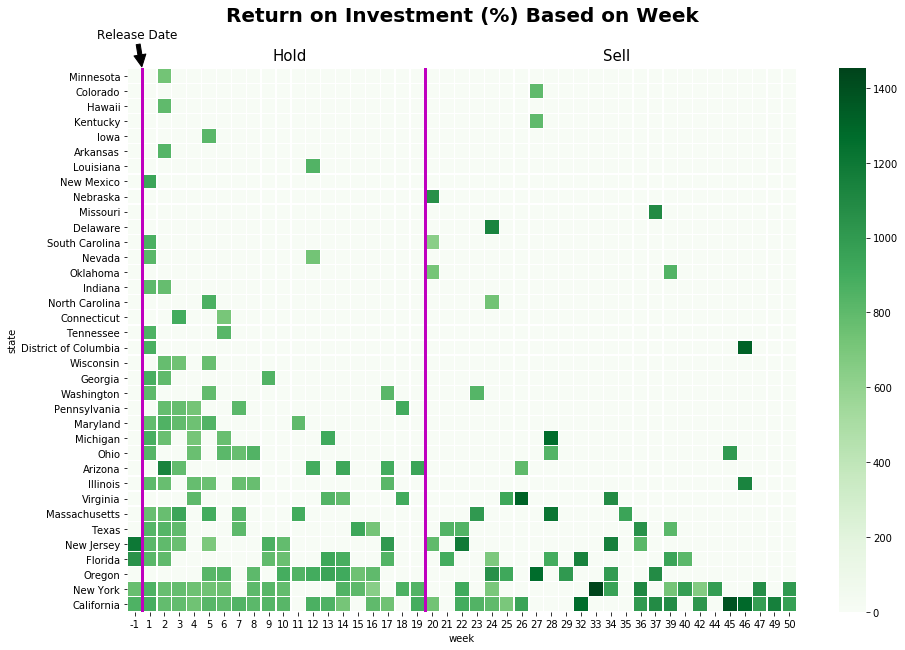

In [43]:
# Set up plot
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

# Plotting the vertical line for the release date
ax.axvline(x=1, 
           c="m", 
           label="Release Date",
           linewidth=3)
# Annotating the vertical line
ax.annotate("Release Date", 
            xy=(1,0),
            xytext=(-2,-2), 
            arrowprops=dict(facecolor="black", shrink=0.05),
            fontsize=12)

# Hold line
ax.axvline(x=20, 
           c="m", 
           label="Hold",
           linewidth=3)
# Annotating the hold vertical line
ax.annotate("Hold", 
            xy=(1,0), 
            xytext=(9.75,-0.5), 
            fontsize=15)


# Annotating the sell area
ax.annotate("Sell", xy=(1,0), xytext=(32,-0.5), fontsize=15)


# Plot title
plt.title("Return on Investment (%) Based on Week",fontdict={"fontsize":20, "fontweight":"bold"})
ax.title.set_position([.5,1.075])


# Plotting ROI % based on week and country
# Linewidths makes each box on plot separate
sns.heatmap(all_weeks_pt, cmap="Greens", linewidths=.25)

plt.show()

### Findings
Based on the heat map above, we can see that within the first 20 weeks after the release date, the ROI was around 700%. If you are looking to make a quick profit, then you could sell your pairs here. I would recommend holding your pairs here.

However, as time went on, the ROI became higher, but there was definitely less transactions. After week 20 is when I would say is the optimal time to sell to gain the most return. My assumptions for this is because as time goes on, we can assume more people will wear their shoes. Thus, leading to less deadstock pairs. We all know when there's a low amount of supply and the demand is high, the price will only increase.

Another insight we can see that California, NY, and Oregon are the top 3 states with the highest ROI. This may be due to the amount of transactions in each of these states. Hawaii, Colorado, and Minnesota being the states with the lowest ROI. This may be due to only having little to 0 transactions.

We can also see that transactions did not occur in ALL 50 states as there's only 37 states shown. 


### Adidas Yeezy 350 Boost Turtle Dove

For the Turtle Doves, we will use a different approach. Since we have a limited amount of transactions over the span of 2 years, we will group them by month rather than week. This is because these released back in 2015 and the hype might have died down since then despite them being so expensive.

In [44]:
# Freq="M" indicates by month
s = yeezy.groupby(["Sneaker Name", "Buyer Region", pd.Grouper(key="Order Date", freq="M")]).mean()

turtle_dove = s[s.index.get_level_values(0) == 'Adidas-Yeezy-Boost-350-Low-Turtledove'].copy()

# Results
turtle_dove

Sale Price  \
Sneaker Name                          Buyer Region         Order Date               
Adidas-Yeezy-Boost-350-Low-Turtledove Arizona              2018-11-30     1042.00   
                                      California           2017-09-30     1875.00   
                                                           2017-10-31     1910.00   
                                                           2018-01-31     1750.00   
                                                           2018-02-28     1877.00   
                                                           2018-03-31     1995.00   
                                                           2018-05-31     1700.00   
                                                           2018-06-30     1700.00   
                                                           2018-07-31     1633.33   
                                                           2018-08-31     1331.00   
                                                           2018-10-31     1448.00   
                                                           2018-11-30     1173.00   
                                                           2018-12-31     1645.00   
                                                           2019-01-31     1150.00   
                                      Delaware             2018-10-31     1555.00   
                                                           2018-12-31     1450.00   
                                      District of Columbia 2017-11-30     1450.00   
                                      Florida              2017-11-30     1545.00   
                                                           2017-12-31     1840.00   
                                                           2018-08-31     1190.00   
                                                           2018-11-30     1398.00   
                                                           2018-12-31     1277.50   
                                      Indiana              2018-11-30     1325.00   
                                      Iowa                 2017-09-30     2300.00   
                                                           2018-01-31     1808.00   
                                                           2018-03-31     1699.00   
                                      Kentucky             2017-09-30     1890.00   
                                      Minnesota            2018-11-30     1270.00   
                                      Missouri             2017-10-31     1503.00   
                                                           2018-08-31     1275.00   
                                                           2018-12-31     1245.00   
                                      New York             2017-09-30     1995.00   
                                                           2017-11-30     1761.00   
                                                           2018-01-31     1675.00   
                                                           2018-03-31     1888.00   
                                                           2018-07-31     1500.00   
                                                           2018-09-30     1362.50   
                                                           2018-11-30     1238.50   
                                                           2018-12-31     1337.50   
                                      North Carolina       2019-02-28     1300.00   
                                      Ohio                 2017-11-30     1989.00   
                                                           2018-10-31     1302.00   
                                      Pennsylvania         2019-01-31     1350.00   
                                      Texas                2018-01-31     1675.00   
                                                           2018-04-30     1775.00   
                                                           2018-05-31     17

In [45]:
# We can drop the sneaker name index because it's only 1 sneaker 
# We will keep the order date index because we aren't grouping by week number relative to the release date
turtle_dove.index = turtle_dove.index.droplevel(level=[0])

# Result
turtle_dove

Sale Price  Retail Price  Shoe Size  ROI (%)
Buyer Region         Order Date                                              
Arizona              2018-11-30     1042.00           200      12.00   421.00
California           2017-09-30     1875.00           200      11.00   837.50
                     2017-10-31     1910.00           200       8.00   855.00
                     2018-01-31     1750.00           200       8.00   775.00
                     2018-02-28     1877.00           200       9.00   838.50
                     2018-03-31     1995.00           200       7.00   897.50
                     2018-05-31     1700.00           200       7.00   750.00
                     2018-06-30     1700.00           200      10.00   750.00
                     2018-07-31     1633.33           200       9.00   716.67
                     2018-08-31     1331.00           200       9.33   565.50
                     2018-10-31     1448.00           200      10.00   624.00
                     2018-11-30     1173.00           200      11.00   486.50
                     2018-12-31     1645.00           200       7.00   722.50
                     2019-01-31     1150.00           200       9.00   475.00
Delaware             2018-10-31     1555.00           200       8.00   677.50
                     2018-12-31     1450.00           200       9.00   625.00
District of Columbia 2017-11-30     1450.00           200      13.00   625.00
Florida              2017-11-30     1545.00           200      11.00   672.50
                     2017-12-31     1840.00           200      10.00   820.00
                     2018-08-31     1190.00           200      12.00   495.00
                     2018-11-30     1398.00           200      10.00   599.00
                     2018-12-31     1277.50           200      10.50   538.75
Indiana              2018-11-30     1325.00           200      10.50   562.50
Iowa                 2017-09-30     2300.00           200      14.00  1050.00
                     2018-01-31     1808.00           200      11.00   804.00
                     2018-03-31     1699.00           200      12.00   749.50
Kentucky             2017-09-30     1890.00           200      12.00   845.00
Minnesota            2018-11-30     1270.00           200      10.00   535.00
Missouri             2017-10-31     1503.00           200      13.00   651.50
                     2018-08-31     1275.00           200      12.00   537.50
                     2018-12-31     1245.00           200      11.00   522.50
New York             2017-09-30     1995.00           200      10.00   897.50
                     2017-11-30     1761.00           200      10.00   780.50
                     2018-01-31     1675.00           200      13.00   737.50
                     2018-03-31     1888.00           200      13.00   844.00
                     2018-07-31     1500.00           200      11.00   650.00
                     2018-09-30     1362.50           200      11.50   581.25
                     2018-11-30     1238.50           200      11.50   519.25
                     2018-12-31     1337.50           200      10.00   568.75
North Carolina       2019-02-28     1300.00           200      13.00   550.00
Ohio                 2017-11-30     1989.00           200       9.00   894.50
                     2018-10-31     1302.00           200      11.00   551.00
Pennsylvania         2019-01-31     1350.00           200      11.00   575.00
Texas                2018-01-31     1675.00           200      13.00   737.50
                     2018-04-30     1775.00           200      10.00   787.50
                     2018-05-31     1700.00           200       8.00   750.00
                     2018-08-31     1450.00           200      10.00   625.00
                     2018-10-31     1325.00           200      11.00   562.50
Virginia             2018-03-31     1697.00           200      12.00   748.50
                     2018-06-30     1390.00           2

With the result of applying the function, we can see that there are some months where there were 0 transactions. To make it easier to plot a heat map later, we can to have all the months even if there were no transactions. To fix this, we are going to create a new dataframe with all the possible months for that specific shoe with all null values in each column. 

Then we will use a right join on the original dateframe to compare what months where there were no transactions.

### New dataframe to represent every possible month

In [46]:
# Earliest transaction based on month 
earliest_m = turtle_dove.index.get_level_values(1).min() 
# Latest transaction based on week number
last_m = turtle_dove.index.get_level_values(1).max()

m = pd.DataFrame(pd.date_range(earliest_m, last_m, freq="M"), columns=['month'])

# Creating new columns and filling them with nulls to represent there were no transactions for that month
m['Sale Price'], m['Retail Price'], m['Shoe Size'], m['ROI (%)'] = [np.nan, 
                                                                    np.nan, 
                                                                    np.nan, 
                                                                    np.nan]
# Result
m

,month,Sale Price,Retail Price,Shoe Size,ROI (%)
0,2017-09-30,nan,nan,nan,nan
1,2017-10-31,nan,nan,nan,nan
2,2017-11-30,nan,nan,nan,nan
3,2017-12-31,nan,nan,nan,nan
4,2018-01-31,nan,nan,nan,nan
5,2018-02-28,nan,nan,nan,nan
6,2018-03-31,nan,nan,nan,nan
7,2018-04-30,nan,nan,nan,nan
8,2018-05-31,nan,nan,nan,nan
9,2018-06-30,nan,nan,nan,nan


### Figuring out which months where there were no transactions

In [47]:
all_months = pd.DataFrame() # Empty DataFrame

# Do it by region
test = turtle_dove.groupby("Buyer Region")

for region in turtle_dove.index.get_level_values(0).unique():
    group = turtle_dove[turtle_dove.index.get_level_values(0) == region]
    
    # Removing the region index
    group.index = group.index.droplevel(level=[0])
    
    group = pd.merge(group,
                     m,
                     left_index=True,
                     right_on="month",
                     how="right")
    
    group["state"] = region
    
    all_months = all_months.append(group, ignore_index=True)


# Results
all_months

,Sale Price_x,Retail Price_x,Shoe Size_x,ROI (%)_x,month,Sale Price_y,Retail Price_y,Shoe Size_y,ROI (%)_y,state
0,nan,nan,nan,nan,2017-09-30,nan,nan,nan,nan,Arizona
1,nan,nan,nan,nan,2017-10-31,nan,nan,nan,nan,Arizona
2,nan,nan,nan,nan,2017-11-30,nan,nan,nan,nan,Arizona
3,nan,nan,nan,nan,2017-12-31,nan,nan,nan,nan,Arizona
4,nan,nan,nan,nan,2018-01-31,nan,nan,nan,nan,Arizona
...,...,...,...,...,...,...,...,...,...,...
319,1380.00,200.00,10.00,590.00,2018-10-31,nan,nan,nan,nan,Wisconsin
320,nan,nan,nan,nan,2018-11-30,nan,nan,nan,nan,Wisconsin
321,nan,nan,nan,nan,2018-12-31,nan,nan,nan,nan,Wisconsin
322,nan,nan,nan,nan,2019-01-31,nan,nan,nan,nan,Wisconsin


In [48]:
# Drop unnecessary columns
all_months.drop(columns=['Sale Price_y', 'Retail Price_y', 'Shoe Size_y', 'ROI (%)_y'], inplace=True)

In [49]:
# Remove the ending "_x" in the columns
column_map = {'Sale Price_x': "Sale Price", 
              'Retail Price_x': "Retail Price", 
              'Shoe Size_x': "Shoe Size", 
              'ROI (%)_x': "ROI (%)"}

all_months.rename(column_map, axis=1, inplace=True)

In [50]:
# Sort values by state and month
all_months.sort_values(["state", "month"], inplace=True)

In [51]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sale Price    53 non-null     float64       
 1   Retail Price  53 non-null     float64       
 2   Shoe Size     53 non-null     float64       
 3   ROI (%)       53 non-null     float64       
 4   month         324 non-null    datetime64[ns]
 5   state         324 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 17.7+ KB


In [52]:
# Result
all_months

,Sale Price,Retail Price,Shoe Size,ROI (%),month,state
0,nan,nan,nan,nan,2017-09-30,Arizona
1,nan,nan,nan,nan,2017-10-31,Arizona
2,nan,nan,nan,nan,2017-11-30,Arizona
3,nan,nan,nan,nan,2017-12-31,Arizona
4,nan,nan,nan,nan,2018-01-31,Arizona
...,...,...,...,...,...,...
319,1380.00,200.00,10.00,590.00,2018-10-31,Wisconsin
320,nan,nan,nan,nan,2018-11-30,Wisconsin
321,nan,nan,nan,nan,2018-12-31,Wisconsin
322,nan,nan,nan,nan,2019-01-31,Wisconsin


### Formatting the df to make it heatmap friendly
To plot the heatmap, these are the following values we want:
1. `month` to be the columns
2. `state` to be the index
3. `ROI (%)` the values

In [53]:
# Save the pivot table into variable
all_months_pt = pd.pivot_table(all_months, 
                               values="ROI (%)",
                               index="state",
                               columns=["month"],
                               fill_value=0)

# Result
all_months_pt

month,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28
state,,,,,,,,,,,,,,,,,,
Arizona,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,421.00,0.00,0,0
California,837.50,855.00,0.00,0,775.00,838.50,897.50,0.00,750,750,716.67,565.50,0.00,624.00,486.50,722.50,475,0
Delaware,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,677.50,0.00,625.00,0,0
District of Columbia,0.00,0.00,625.00,0,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0
Florida,0.00,0.00,672.50,820,0.00,0.00,0.00,0.00,0,0,0.00,495.00,0.00,0.00,599.00,538.75,0,0
Indiana,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,562.50,0.00,0,0
Iowa,1050.00,0.00,0.00,0,804.00,0.00,749.50,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0
Kentucky,845.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0
Minnesota,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,535.00,0.00,0,0


In [54]:
# Finding the average ROI for each state and getting the index
new_index = all_months_pt.mean(axis=1).sort_values().index

# Sorting the original df by the mean ROI
all_months_pt = all_months_pt.reindex(labels=new_index)

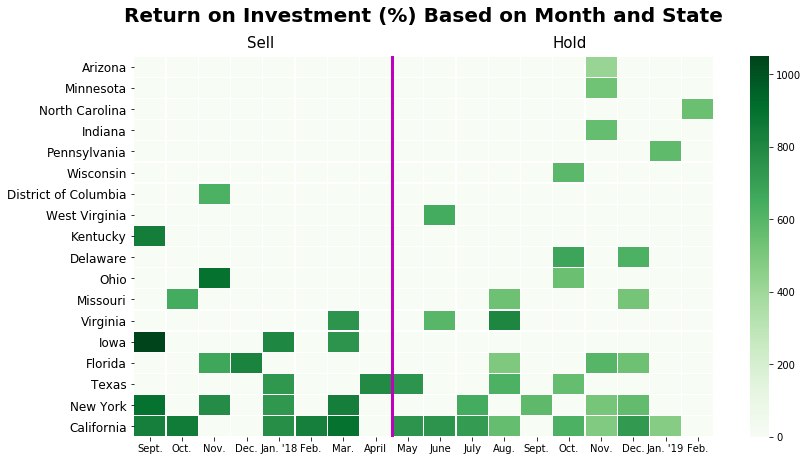

In [55]:
# Set up plot
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot()

# Annotating the hold area
ax.annotate("Hold", 
            xy=(1,0), 
            xytext=(13,-0.4), 
            fontsize=15)


# Sell line
ax.axvline(x=8, 
           c="m", 
           label="Sell",
           linewidth=3)
# Annotating the sell area
ax.annotate("Sell", xy=(1,0), xytext=(3.5,-0.4), fontsize=15)


# Plot title
plt.title("Return on Investment (%) Based on Month and State",fontdict={"fontsize":20, "fontweight":"bold"})
ax.title.set_position([.5,1.075])


# Plotting ROI % based on week and country
# Linewidths makes each box on plot separate
sns.heatmap(all_months_pt, cmap="Greens", linewidths=.25)

label = ["Sept.", "Oct.","Nov.","Dec.", 
          "Jan. '18", "Feb.", "Mar.", "April", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec.",
          "Jan. '19", "Feb."]
plt.xticks(ticks=np.arange(0.5,18.5,1), labels=label, rotation=0)
plt.yticks(fontsize=12)
plt.xlabel(xlabel="")
plt.ylabel(ylabel="")


plt.show()

### Findings
First off, we can see that there weren't many transactions for the Turtledoves. This maybe because it released back in 2015, about 3 years before the first transaction in this dataset. The popularity of the Yeezys have definitely died down over the years as Nike and Off-White started releasing their shoes.

Secondly, we can see that the ROI slightly decreases from Sept. 2017 - Feb. 2019. Based off this, I would have recommended selling your pairs before April 2018. After April 2018, the ROI isn't quite as high and this may be due to Adidas introducing more color ways for the Wave Runners. This is just an assumption. In the case that Adidas doesn't restock the Turtledoves and somehow become hype again, I would say hold your pairs until that day comes. 

As expected, we can see that California and New York hold the most transactions. 

## Conclusion

In this project, I answered the following questions:
1. Which brand generated more sales over the provided duration of order dates? (Sept. 2017 - Feb. 2019)
2. Which regions had the most sales/transactions? Based on Yeezys/Off-White?
3. Which shoe was the "best" investment? In other words, which shoe has the highest ROI?
4. Given the shoes with the highest ROI, when was the best time to sell those shoes?


### Insights
I found that in the resale market, **Off-Whites** yielded about **\$18,663,149.21** in total sales and **Yeezys** yielded about **\$25,980,674.29** in total sales. However, **Off-Whites** had an average sale of **\\$671.48 per transaction** while **Yeezys** had an average sale of **\\$360.03 per transaction.**

For both Yeezys and Off-White, the **top 4 regions** were **California, New York, Oregon, and Florida** respectively. For **Yeezys, Texas came in 5th** and for **Off-White, New Jersey came in 5th**. Generally, Yeezys generated more sales, but I found out that Off-White has a higher price premium/ROI per transaction. 

Given all the shoes, I found that the **Off-White Air Jordan 1 All White** had the **highest average ROI of 861.09%**. The close second was the same shoe but in the Chicago colorway (831.47%). In an alternate universe where you are able to get every pair for retail, you would have made 8 times the amount on the resale market. 

For the **Off-White Air Jordan 1 All Whites**, I would have recommended **holding your pairs for about 20 weeks** after the release date. If you are looking to make a quick profit, then you could sell your pairs here. **After week 20** is when I would say is the optimal time to **sell to gain the most return**. My assumptions for this is because as time goes on, we can assume more people will wear their shoes. Thus, leading to less deadstock pairs. We all know when there's a low amount of supply and the demand is high, the price will only increase.

Another insight we can see that **California, NY, and Oregon are the top 3 states with the highest ROI**. This may be due to the amount of transactions in each of these states. Hawaii, Colorado, and Minnesota being the states with the lowest ROI. This may be due to only having little to 0 transactions.

For the **Adidas Yeezy 350 Turtledoves**, I would have recommended **selling your pairs before April 2018**. After this month, the ROI seemed to drop down and this may be due to Adidas introducing more color ways for the Wave Runners or Nike taking over the resale market, I am not sure. In the case that Adidas doesn't restock the Turtledoves and somehow become hype again, I would say hold your pairs until that day comes.

Thanks for reading! Let me know if you have any suggestions or comments.
